log-like, TS: center_high_res_no_dm -1186161.14316 -1349296.9978
log-like, TS: center_high_res -1186693.36627 -1350615.23474


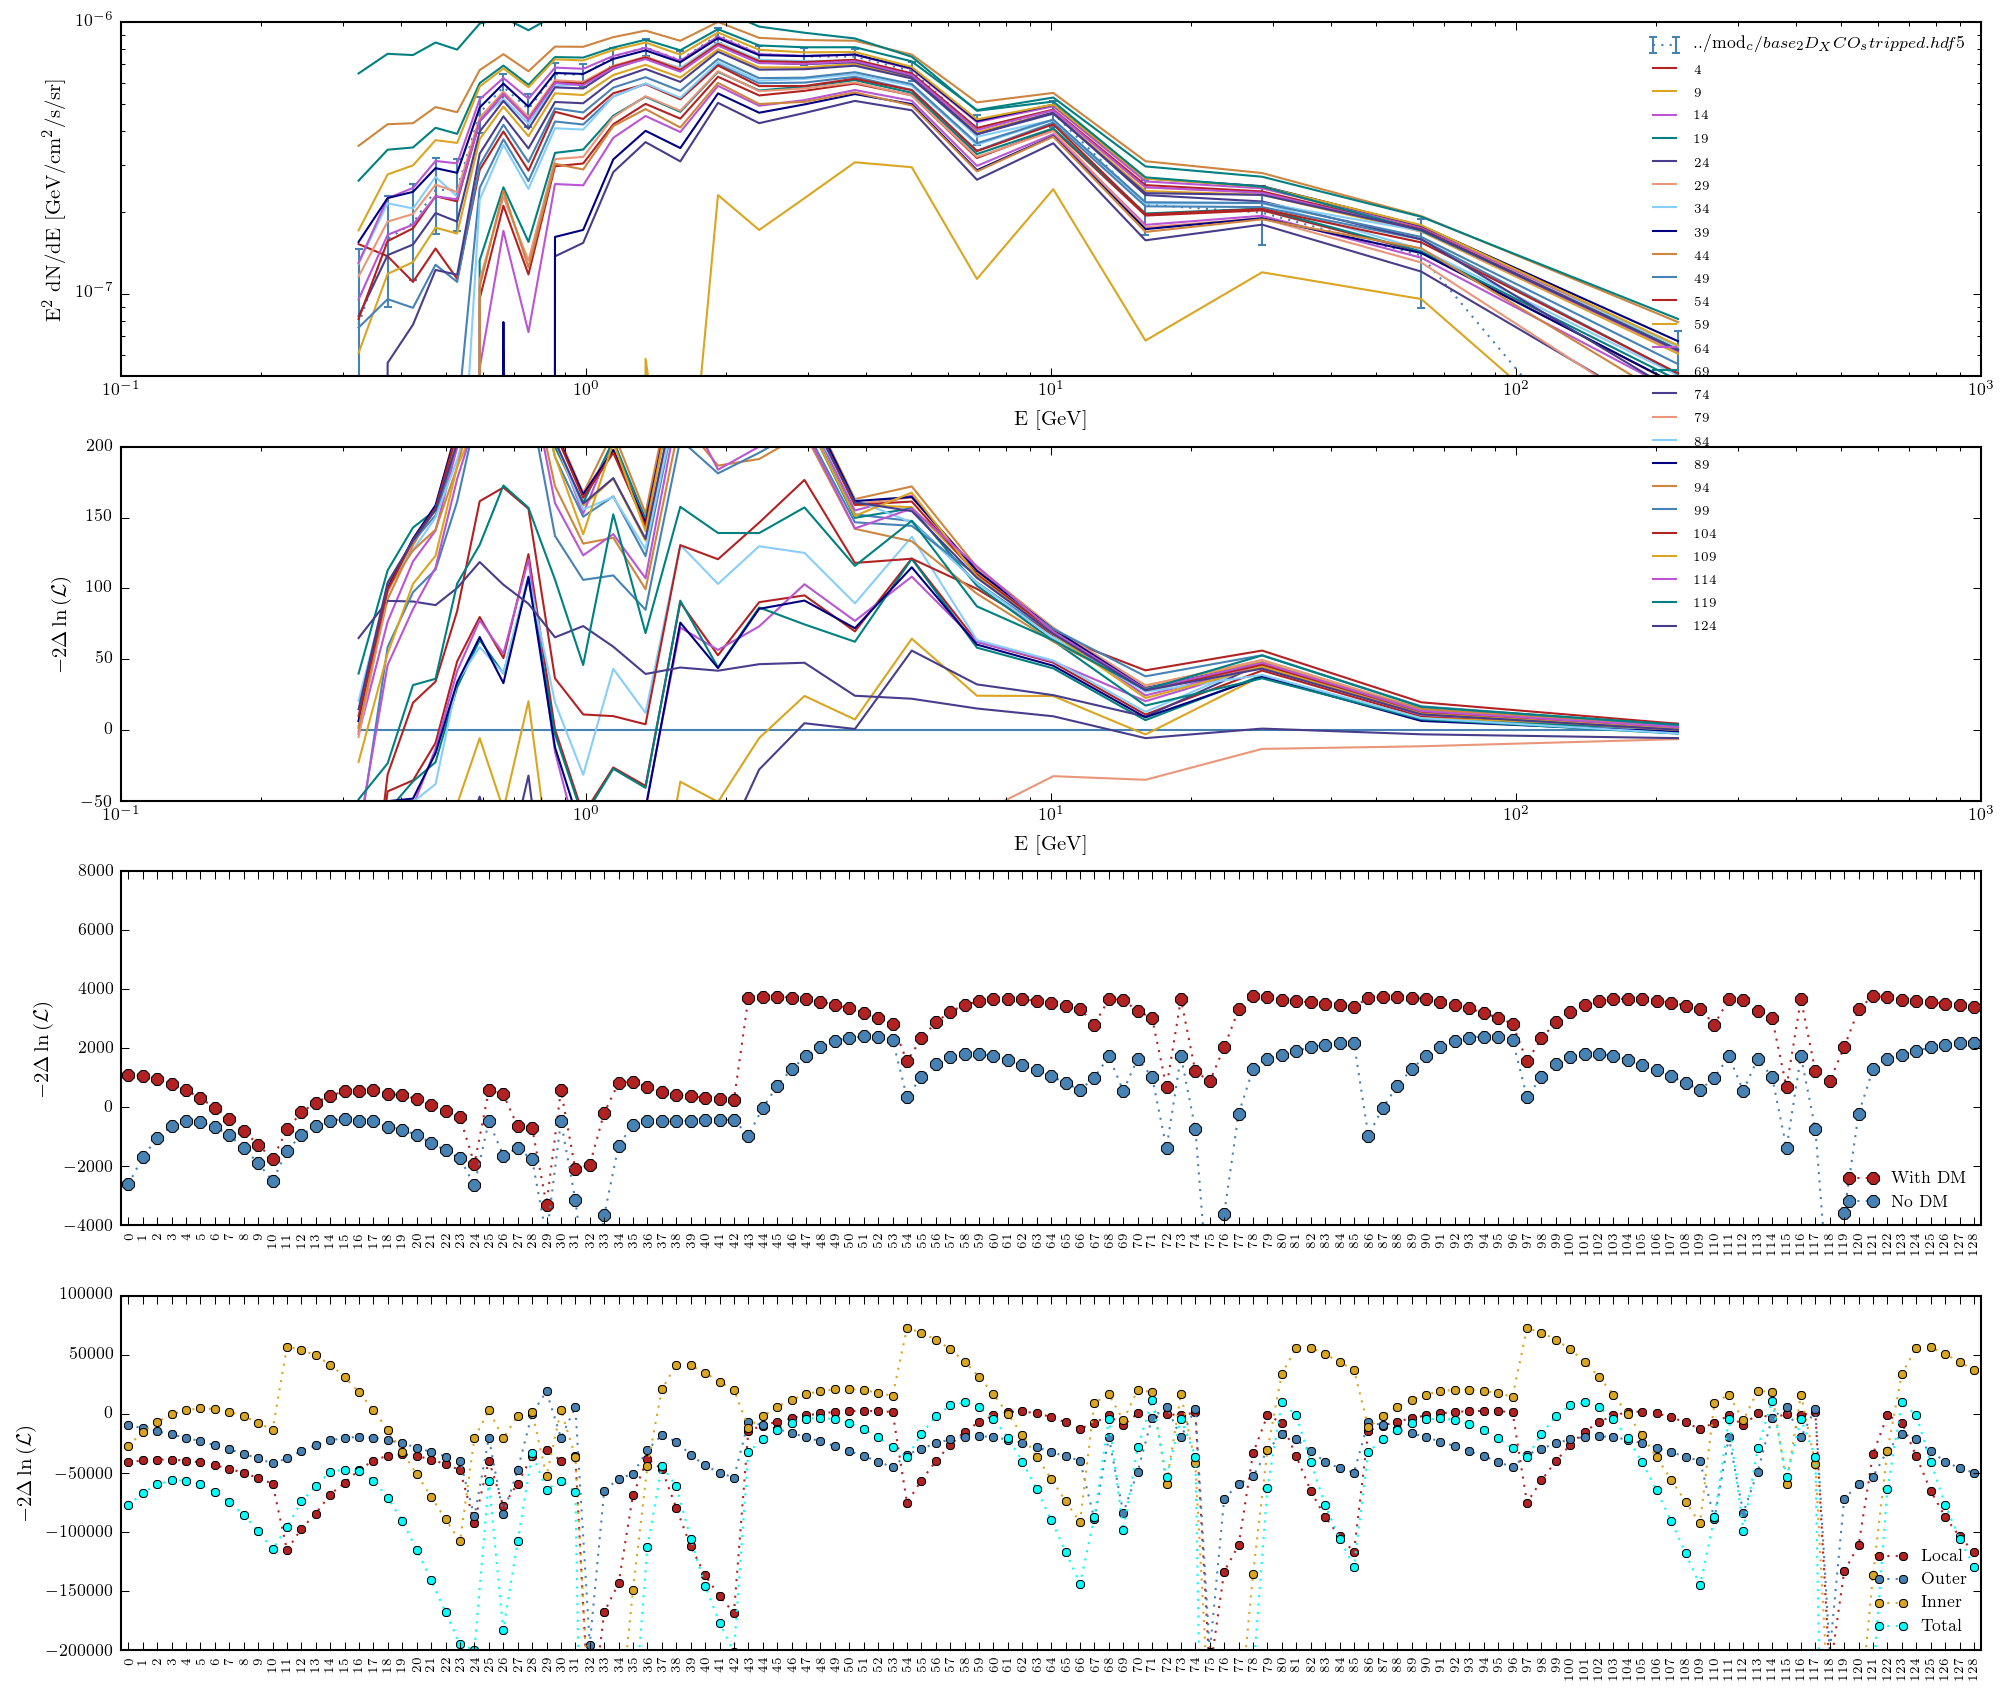

In [34]:
def PlotSeriesLong(start, stop, text,labels, ylim=None, mod=1, ylim_glob=None):
    plt.figure(figsize=(16,14))
    models = ['../mod_c/base_2D_XCO_stripped.hdf5'] + ['mod_k_%i_XCO_stripped.hdf5'%i for i in range(start, stop)]
    h_base = h5py.File('../mod_c/base_2D_XCO_stripped.hdf5')
    h_center_HR = h5py.File('../mod_c/mod_e_center_high_res.hdf5')
    
    print 'log-like, TS:', 'center_high_res_no_dm', np.sum(h_center_HR['/fit_results/GC_no_dm/'].attrs['loglike_total']), 2*(h_base['/fit_results/GC_no_dm/'].attrs['loglike_total']-h_center_HR['/fit_results/GC_no_dm/'].attrs['loglike_total'])
    print 'log-like, TS:', 'center_high_res', np.sum(h_center_HR['/fit_results/GC/'].attrs['loglike_total']), 2*(h_base['/fit_results/GC/'].attrs['loglike_total']-h_center_HR['/fit_results/GC/'].attrs['loglike_total'])
    
    fits = []
    ll, ll_no_dm = [], []
    llg1, llg2, llg3, llg4 = [],[],[],[]

    
    for i, model in enumerate(models):
            
        try:
            h_base = h5py.File('../mod_c/base_2D_XCO_stripped.hdf5', 'r')
            h = h5py.File('../mod_c/'+model)
            
            
            fit = h['/fit_results/GC'].attrs
            fit_no_dm = h['/fit_results/GC_no_dm'].attrs
            #print 'log-like, TS:', models[i], np.sum(fit['loglike_total']), 2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total'])
            ll.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total']))
            ll_no_dm.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit_no_dm['loglike_total']))
            
            fit_global = h['/fit_results/global'].attrs
            llg1.append(fit_global['localfval'])
            llg2.append(fit_global['outerfval'])
            llg3.append(fit_global['innerfval'])
            llg4.append(llg1[-1]+llg2[-1]+llg3[-1])
            
            #print fit.keys()
            E, flux, stat = fit['energies'], fit['flux_DM'], fit['fluxunc_DM']
            
            plt.subplot(411)

            if i==0:
                plt.errorbar(E/1e3,E**2*flux/1e3,([E**2,E**2]*stat.T/1e3), 
                             label=model,capthick=1, capsize=2, ls=':' )
            elif i%mod==0:
                plt.errorbar(E/1e3,(E**2*flux/1e3), 
                             label=labels[i-1],capthick=1, capsize=2, ls='-' )

            plt.subplot(412)
            
            #print h_base['/fit_results/GC/'].attrs.keys()
            if i%mod==0:
                TS = 2*(h_base['/fit_results/GC/'].attrs['loglike']-fit['loglike'])
                plt.plot(E/1e3, TS)

        except:
            ll.append(-1e10)
            ll_no_dm.append(-1e10)
            llg1.append(-1e10)
            llg2.append(-1e10)
            llg3.append(-1e10)
            llg4.append(-1e10)
            print 'no results found for model ', model
    
    
    plt.subplot(413)
    plt.plot(range(len(labels)), ll[1:],marker='o',ls=':',color='firebrick', label='With DM')
    plt.plot(range(len(labels)), ll_no_dm[1:],marker='o',ls=':',color='steelblue',label='No DM')
    
    
    plt.subplot(411)
    plt.legend(frameon=False, fontsize=8)
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    plt.ylim(5e-8,1e-6)
    if 'spiral' in text:
        plt.yscale('symlog')
        plt.ylim(5e-7,2e-6)
    
    plt.subplot(412)
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$')   
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    plt.xscale('log')
    plt.ylim(-50,200)
            
    plt.subplot(413)
    plt.xticks(range(len(labels)), labels, rotation='vertical')
    plt.xlim(-.5, len(labels)-.5)
    if ylim is not None:
        plt.ylim(ylim)
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$') 
    plt.legend(frameon=False, fontsize=8, loc=4)
    
    plt.subplot(414)
    
    # ------------------------------------------------
    # Global fitting plot
    # ------------------------------------------------
    plt.plot(range(len(labels)), -2*(llg1[1:]-llg1[0]),marker='o',ls=':', markersize=4, color='firebrick', label='Local')
    plt.plot(range(len(labels)), -2*(llg2[1:]-llg2[0]),marker='o',ls=':', markersize=4,color='steelblue', label='Outer')
    plt.plot(range(len(labels)), -2*(llg3[1:]-llg3[0]),marker='o',ls=':', markersize=4,color='goldenrod', label='Inner')
    plt.plot(range(len(labels)), -2*(llg4[1:]-llg4[0]),marker='o',ls=':', markersize=4,color='cyan', label='Total')
    plt.xticks(range(len(labels)), labels, rotation='vertical')
    plt.xlim(-.5, len(labels)-.5)
    if ylim_glob is not None:
        plt.ylim(ylim_glob)
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$') 
    plt.legend(frameon=False, fontsize=8, loc=4)

    
    

PlotSeriesLong(start=0, stop=129, text='all models', labels=['$_{'+str(i)+'}$' for i in range(0,129)], mod=5, ylim=(-4e3,8e3), ylim_glob=(-2e5,1e5))
plt.show()

In [60]:
import cPickle as pickle
import h5py

def PlotSeries(start, stop, text,labels, ylim=None, mod=1, ylim_glob=None, line=None):
    plt.figure(figsize=(15,2.35))
    models = ['../mod_c/base_2D_XCO_stripped.hdf5'] + ['mod_k_%i_XCO_stripped.hdf5'%i for i in range(start, stop)]
    h_base = h5py.File('../mod_c/base_2D_XCO_stripped.hdf5')
    h_center_HR = h5py.File('../mod_c/mod_e_center_high_res.hdf5')
    
    #print 'log-like, TS:', 'center_high_res_no_dm', np.sum(h_center_HR['/fit_results/GC_no_dm/'].attrs['loglike_total']), 2*(h_base['/fit_results/GC_no_dm/'].attrs['loglike_total']-h_center_HR['/fit_results/GC_no_dm/'].attrs['loglike_total'])
    #print 'log-like, TS:', 'center_high_res', np.sum(h_center_HR['/fit_results/GC/'].attrs['loglike_total']), 2*(h_base['/fit_results/GC/'].attrs['loglike_total']-h_center_HR['/fit_results/GC/'].attrs['loglike_total'])
    
    fits = []
    ll, ll_no_dm = [], []
    llg1, llg2, llg3, llg4 = [],[],[],[]
    
    p7v6_LL_total = 2*(np.sum(pickle.load(open('../p7v6_Analysis_loglike.pickle','rb')))-h_base['/fit_results/GC/'].attrs['loglike_total'])
    p6v11_LL_total = 2*(np.sum(pickle.load(open('../p6v11_Analysis_loglike.pickle','rb')))-h_base['/fit_results/GC/'].attrs['loglike_total'])
    
    for i, model in enumerate(models):        
        try:
            
            h = h5py.File('../mod_c/'+model)
            
            fit = h['/fit_results/GC'].attrs
            fit_no_dm = h['/fit_results/GC_no_dm'].attrs
            #print 'log-like, TS:', models[i], np.sum(fit['loglike_total']), 2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total'])
            ll.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total']))
            ll_no_dm.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit_no_dm['loglike_total']))
            
            fit_global = h['/fit_results/global'].attrs
            llg1.append(fit_global['localfval'])
            #print fit_global['localfval'], fit_global['outerfval'], fit_global['innerfval']
            llg2.append(fit_global['outerfval'])
            llg3.append(fit_global['innerfval'])
            llg4.append(llg1[-1]+llg2[-1]+llg3[-1])
            
            #print fit.keys()
            E, flux, stat = fit['energies'], fit['flux_DM'], fit['fluxunc_DM']
            
            plt.subplot(131)

            if i==0:
                plt.errorbar(E/1e3,E**2*flux/1e3,([E**2,E**2]*stat.T/1e3), 
                             label='Base 2D',capthick=1, capsize=2, ls=':' )
            elif i%mod==0:
                plt.errorbar(E/1e3,(E**2*flux/1e3), 
                             label=labels[i-1],capthick=1, capsize=2, ls='-' )

            plt.subplot(132)
            
#             #print h_base['/fit_results/GC/'].attrs.keys()
#             if i%mod==0:
#                 TS = 2*(h_base['/fit_results/GC/'].attrs['loglike']-fit['loglike'])
#                 plt.plot(E/1e3, TS)

        except:
            ll.append(-1e10)
            ll_no_dm.append(-1e10)
            llg1.append(-1e10)
            llg2.append(-1e10)
            llg3.append(-1e10)
            llg4.append(-1e10)
            print 'no results found for model ', model
    
    
    plt.subplot(132)
    plt.plot(range(len(labels)), ll[1:],marker='o',ls=':',color='firebrick', label='With DM')
    plt.plot(range(len(labels)), ll_no_dm[1:],marker='o',ls=':',color='steelblue',label='No DM')
    
    plt.subplot(131)
    plt.legend(frameon=False, fontsize=8)
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    plt.ylim(5e-8,2e-6)
#     if 'spiral' in text:
#         plt.yscale('symlog')
#         plt.ylim(5e-7,2e-6)
    
#     plt.subplot(222)
#     plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$')   
#     plt.xlabel(r'$\rm{E\ [GeV]}$')
#     plt.xscale('log')
#     plt.ylim(-50,200)
            
    plt.subplot(132)
    plt.xticks(range(len(labels)), labels, rotation='vertical')
    plt.xlim(-.5, len(labels)-.5)
    if ylim is not None:
        plt.ylim(ylim)
        
    if line is not None:
        yl = plt.ylim()
        plt.vlines(line, yl[0],yl[1],color='k',alpha=.25, linestyle='--')
    
    plt.hlines(p7v6_LL_total, -1, len(labels), color='steelblue')
    plt.hlines(p6v11_LL_total, -1, len(labels), color='steelblue')
    plt.hlines(0, -1, len(labels), color='steelblue')
    
    off_x = 0.05*(len(labels)+2)
    plt.text(off_x, p6v11_LL_total-.06*(plt.ylim()[1]-plt.ylim()[0]),'P6V11', color='steelblue', fontsize=8)
    plt.text(off_x, p7v6_LL_total-.06*(plt.ylim()[1]-plt.ylim()[0]),'P7V6', color='steelblue', fontsize=8)
    plt.text(off_x, 0-.06*(plt.ylim()[1]-plt.ylim()[0]),'ModA', color='steelblue', fontsize=8)
               
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$') 
    plt.legend(frameon=False, fontsize=8, loc=4)
    
    plt.subplot(133)
    
    # ------------------------------------------------
    # Global fitting plot
    # ------------------------------------------------
    plt.plot(range(len(labels)), -2*(llg1[1:]-llg1[0]),marker='o',ls=':', markersize=4, color='firebrick', label='Local')
    plt.plot(range(len(labels)), -2*(llg2[1:]-llg2[0]),marker='o',ls=':', markersize=4,color='steelblue', label='Outer')
    plt.plot(range(len(labels)), -2*(llg3[1:]-llg3[0]),marker='o',ls=':', markersize=4,color='goldenrod', label='Inner')
    plt.plot(range(len(labels)), -2*(llg4[1:]-llg4[0]),marker='o',ls=':', markersize=4,color='cyan', label='Total')
    plt.xticks(range(len(labels)), labels, rotation='vertical')
    plt.xlim(-.5, len(labels)-.5)
    if ylim_glob is not None:
        plt.ylim(ylim_glob)
    if line is not None:
        yl = plt.ylim()
        plt.vlines(line,yl[0],yl[1],color='k',alpha=.25, linestyle='--')
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$') 
    plt.legend(frameon=False, fontsize=8, loc=4, ncol=2)
    

def PlotModels(pathList, text,labels, ylim=None):
    plt.figure(figsize=(14,2.5))
    models = ['../base_2D.hdf5'] + pathList
    h_base = h5py.File('../base_2D.hdf5')
    
    fits = []
    ll, ll_no_dm = [], []

    
    for i, model in enumerate(models):
        #try:
        h_base = h5py.File('../base_2D.hdf5')
        h = h5py.File('../mod_c/'+model)
        #try:
        h['/fit_results/GC/'].attrs.keys()
        fit = h['/fit_results/GC'].attrs
        fit_no_dm = h['/fit_results/GC_no_dm'].attrs
        print 'log-like, TS:', models[i], np.sum(fit['loglike_total']), 2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total'])
        ll.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total']))
        ll_no_dm.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit_no_dm['loglike_total']))
        #print fit.keys()
        E, flux, stat = fit['energies'], fit['flux_DM'], fit['fluxunc_DM']

        plt.subplot(131)

        if i==0:
            plt.errorbar(E/1e3,E**2*flux/1e3,([E**2,E**2]*stat.T/1e3), 
                         label=model,capthick=1, capsize=2, ls=':' )
        else:
            plt.errorbar(E/1e3,(E**2*flux/1e3), 
                         label=labels[i-1],capthick=1, capsize=2, ls='-' )

        plt.subplot(132)

        #print h_base['/fit_results/GC/'].attrs.keys()
       
        TS = 2*(h_base['/fit_results/GC/'].attrs['loglike']-fit['loglike'])
        plt.plot(E/1e3, TS)

#         except:
#             ll.append(-1e10)
#             ll_no_dm.append(-1e-10)
#             print 'no results found for model ', model
    
    
    plt.subplot(133)
    plt.plot(range(len(labels)), ll[1:],marker='o',ls=':',color='firebrick', label='With DM')
    plt.plot(range(len(labels)), ll_no_dm[1:],marker='o',ls=':',color='steelblue',label='No DM')
    
    
    plt.subplot(131)
    plt.legend(frameon=False, fontsize=8)
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    if 'spiral' in text:
        plt.yscale('symlog')
        plt.ylim(5e-8,2e-6)
    
    plt.subplot(132)
    plt.ylabel(r'$-\Delta\ln{(\mathcal{L})}$')   
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    plt.xscale('log')
    plt.ylim(-200,50)
            
    plt.subplot(133)
    plt.xticks(range(len(labels)), labels, rotation='vertical')
    plt.xlim(-.5, len(labels)-.5)
    if ylim is not None:
        plt.ylim(ylim)
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$') 
    plt.legend(frameon=False, fontsize=8, loc=4, ncol=2)


#PlotModels(['../mod_c/mod_e_center_high_res.hdf5','../mod_c/mod_e_center_high_res_XCO.hdf5'], text='High-Res CR', labels=['HR','HR $X_{CO}$'])



# PEB HI+H2.
##Default Model is $v_a=35$ km/s, $D_0=7.2e28$, $f_{sprl}=.2$, SNR source dist, $z_{max}=3.5$ kpc, $T_s=150$, Mag5

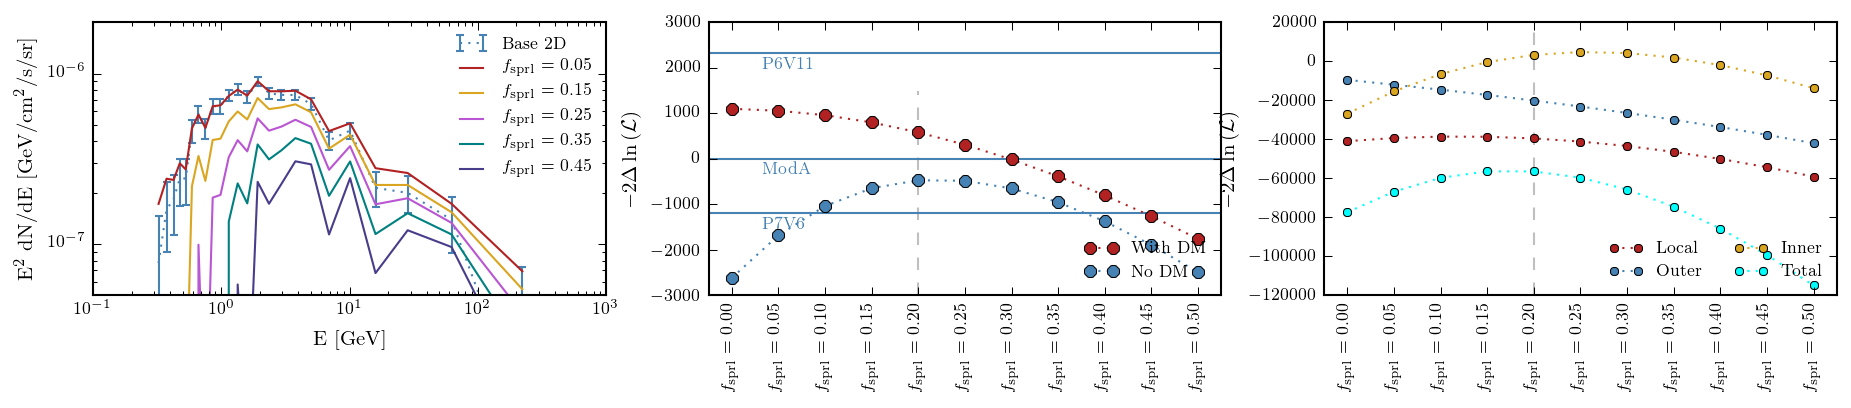

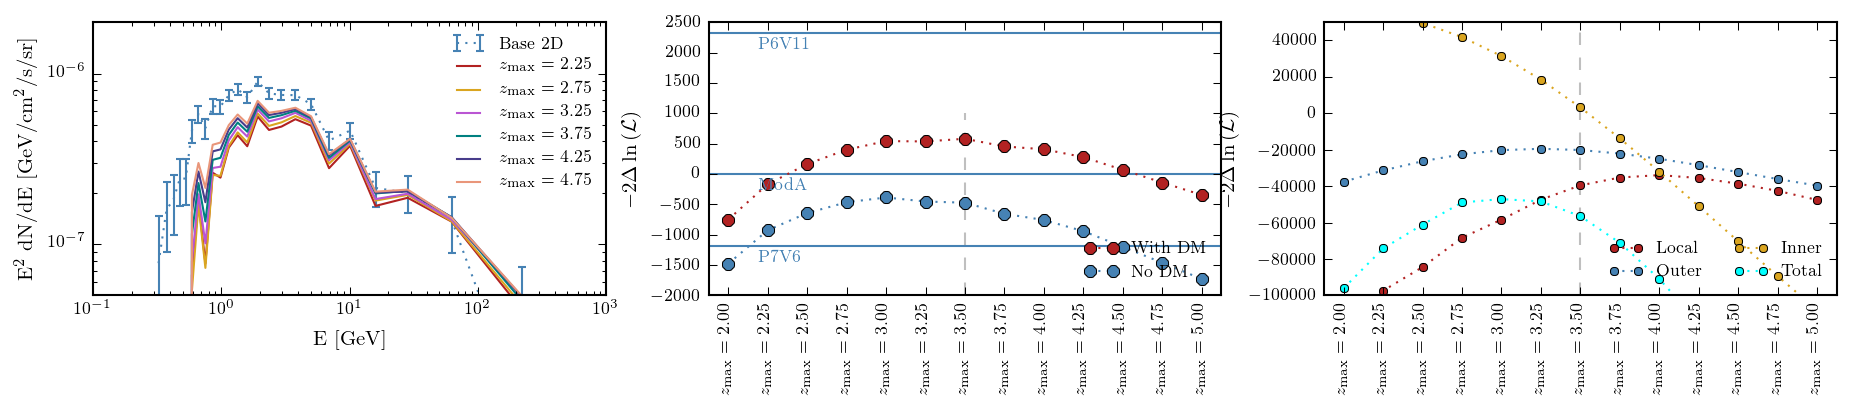

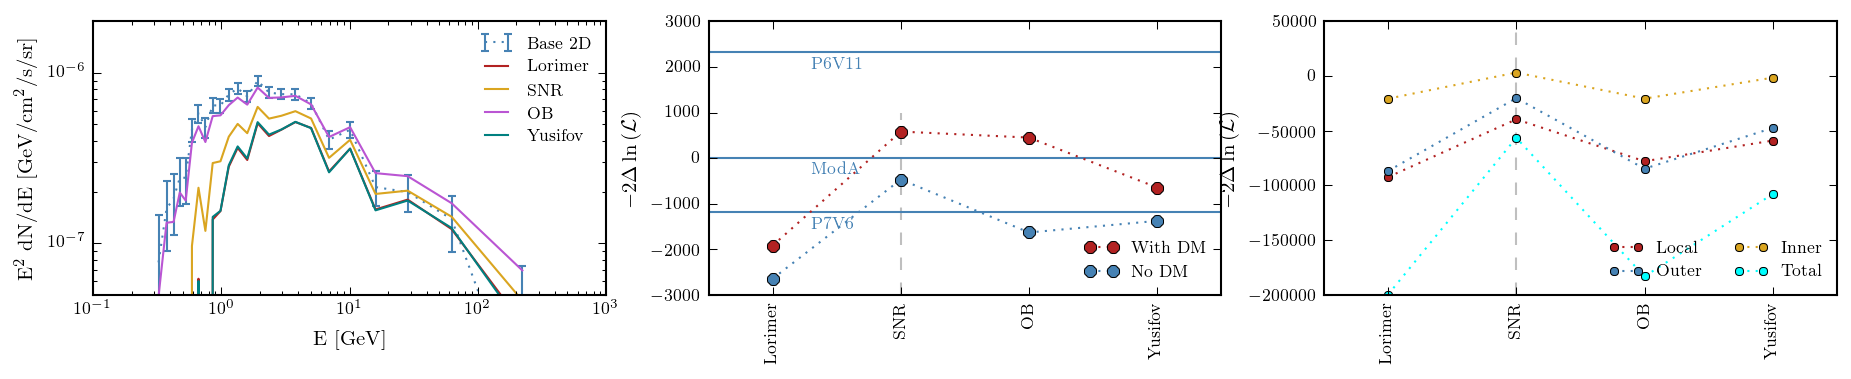

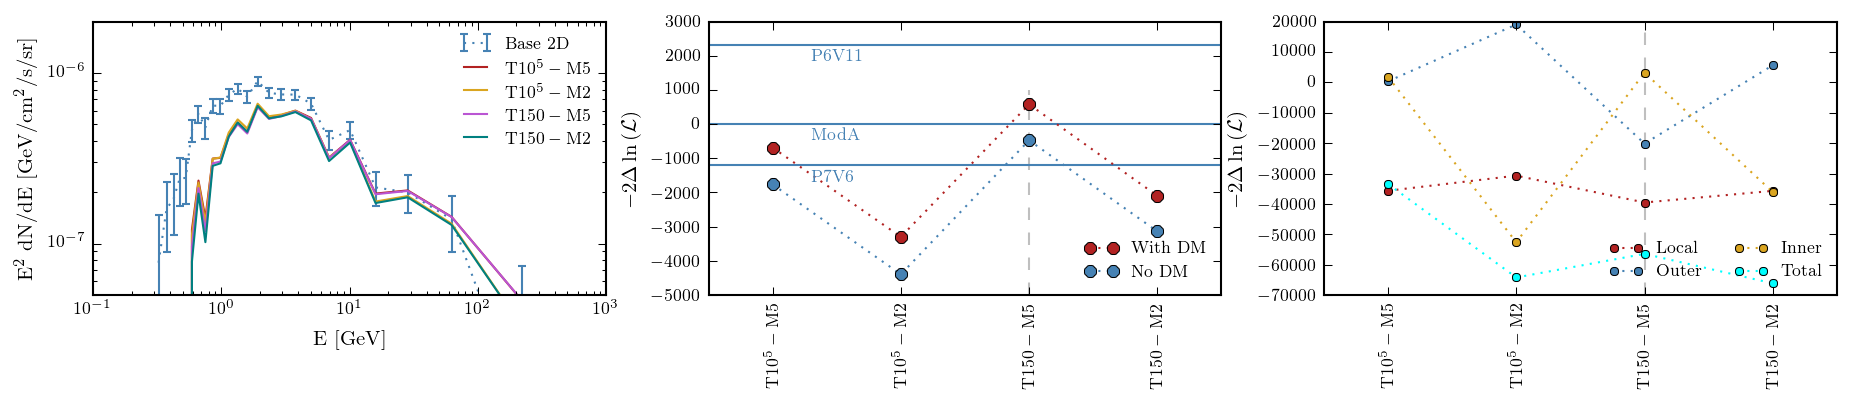

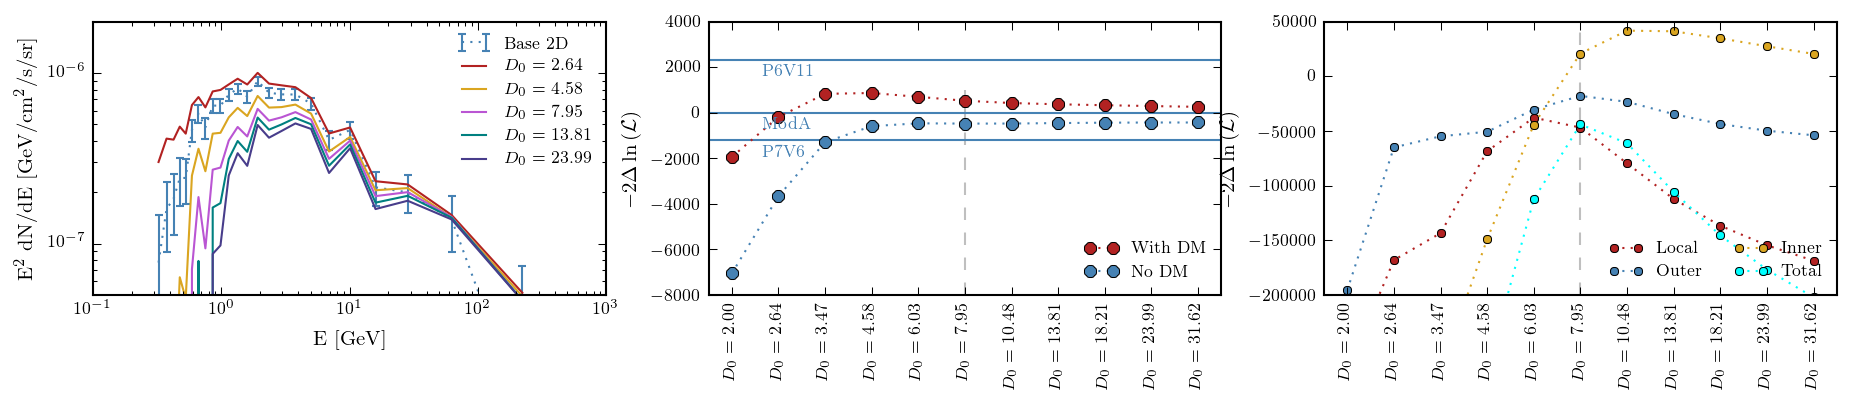

In [61]:

PlotSeries(start=0, stop=11, text='Spiral Fraction', labels=[r'$f_{\rm H2}=%1.2f$'%i for i in np.linspace(0,.5,11)], mod=2, line=4)
plt.show()
PlotSeries(start=11, stop=24, text='z_{\rm max}', labels=[r'$z_{\rm max}=%1.2f$'%i for i in np.linspace(2,5,13)], mod=2, ylim_glob=(-1e5,.5e5), line=6)
plt.show()
PlotSeries(start=24, stop=28, text='Primary CR Sources', labels=('Lorimer','SNR','OB','Yusifov'), line=1)
plt.show()
PlotSeries(start=28, stop=32, text=r'$\rm T_S$ and Mag(B-V)', labels=(r'$\rm T10^5-M5$',r'$\rm T10^5-M2$',r'$\rm T150-M5$',r'$\rm T150-M2$'), line=2)
plt.show()
PlotSeries(start=32, stop=43, text=r'$\rm D_0\ [10^{28} cm^{3}s^{-1}]$', labels=['$D_0=%2.2f' % D + '$' for D in np.logspace(np.log10(2e28),29.5,11)/1e28], ylim_glob=(-2e5,.5e5), mod=2, line=5)
plt.show()


# Galrop HI, galprop H2.   

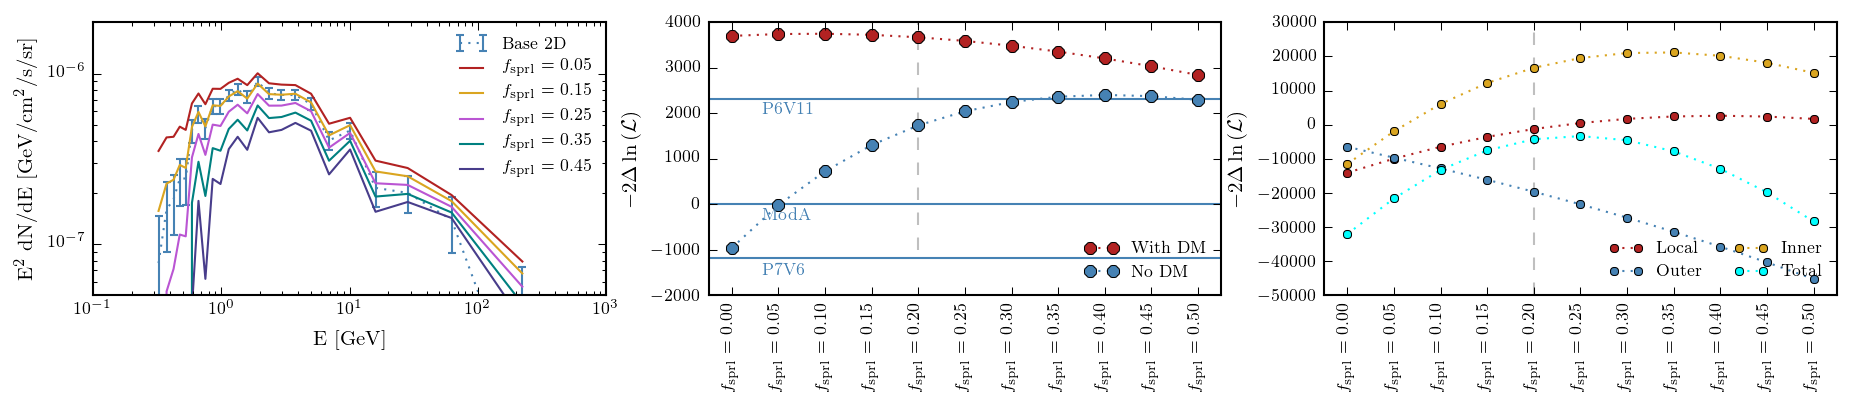

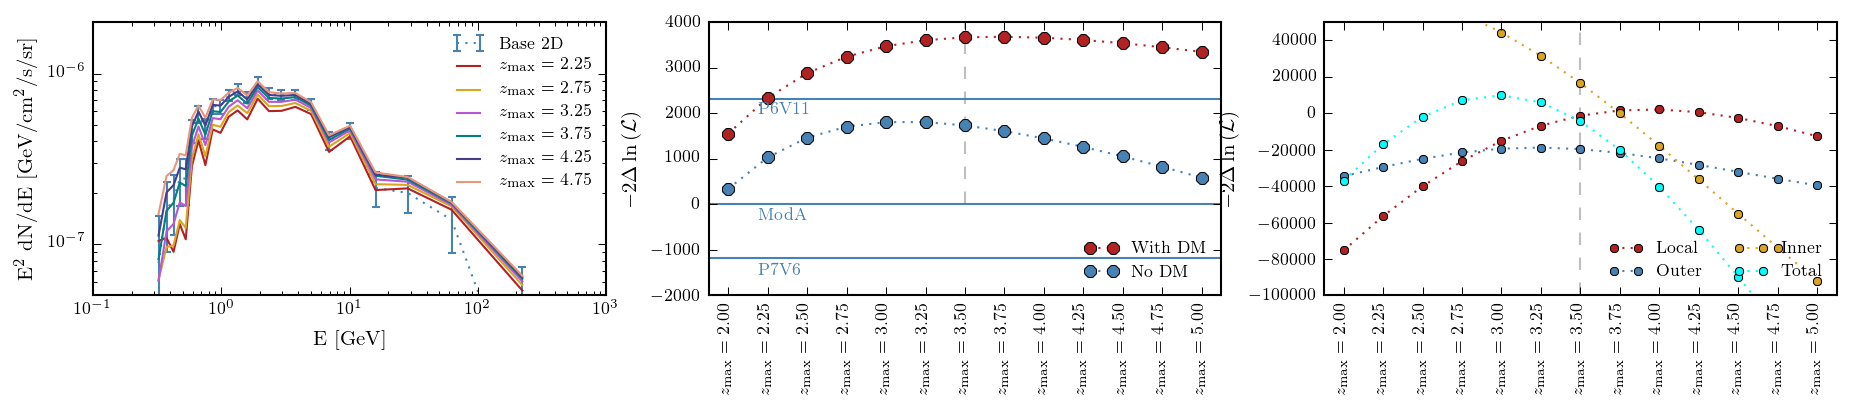

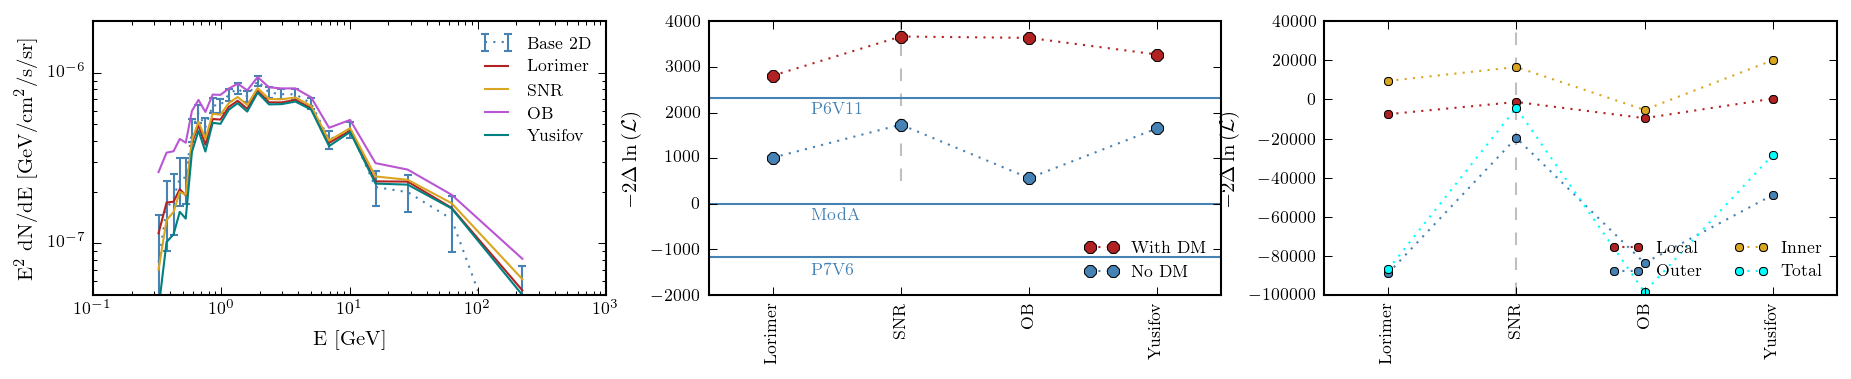

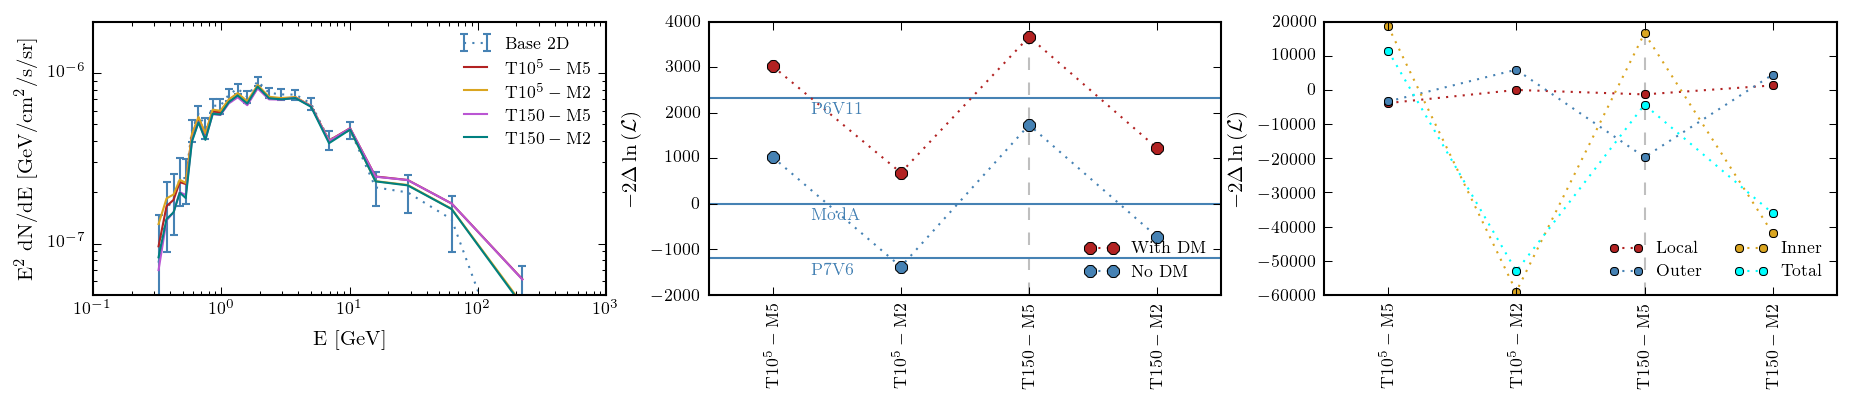

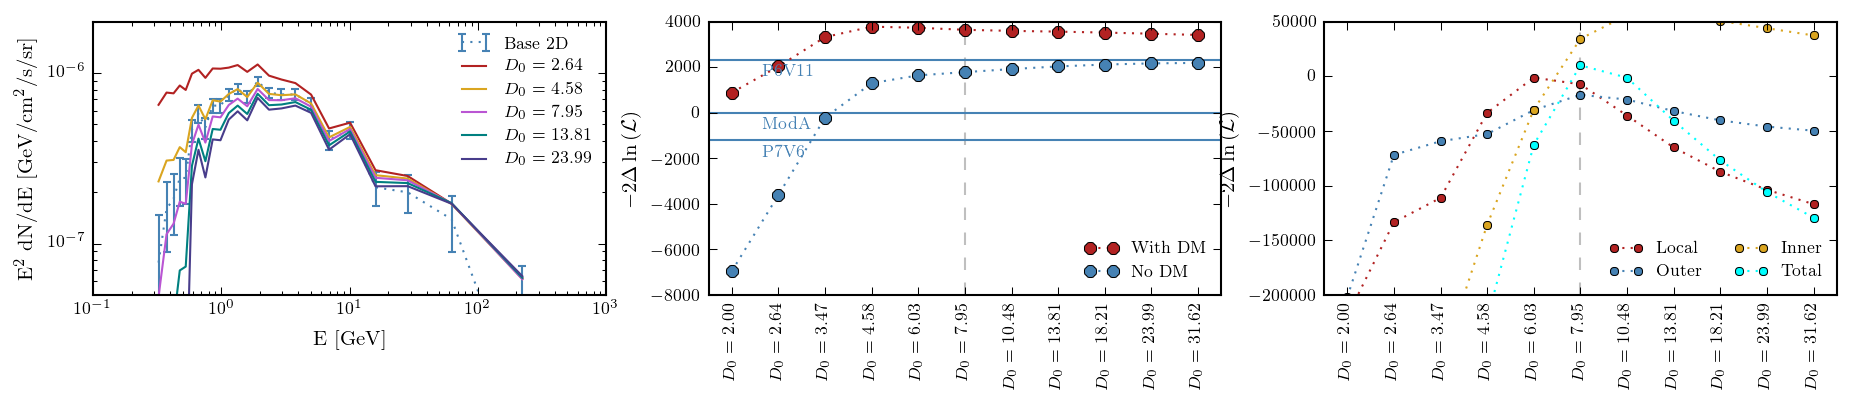

In [62]:

PlotSeries(start=0+43, stop=11+43, text='Spiral Fraction', labels=[r'$f_{\rm H2}=%1.2f$'%i for i in np.linspace(0,.5,11)], mod=2, line=4)
plt.show()
PlotSeries(start=11+43, stop=24+43, text='z_{\rm max}', labels=[r'$z_{\rm max}=%1.2f$'%i for i in np.linspace(2,5,13)], mod=2, ylim_glob=(-1e5,.5e5), line=6)
plt.show()
PlotSeries(start=24+43, stop=28+43, text='Primary CR Sources', labels=('Lorimer','SNR','OB','Yusifov'), line=1)
plt.show()
PlotSeries(start=28+43, stop=32+43, text=r'$\rm T_S$ and Mag(B-V)', labels=(r'$\rm T10^5-M5$',r'$\rm T10^5-M2$',r'$\rm T150-M5$',r'$\rm T150-M2$'), line=2)
plt.show()
PlotSeries(start=32+43, stop=43+43, text=r'$\rm D_0\ [10^{28} cm^{3}s^{-1}]$', labels=['$D_0=%2.2f' % D + '$' for D in np.logspace(np.log10(2e28),29.5,11)/1e28], ylim_glob=(-2e5,.5e5), mod=2, line=5)
plt.show()


#F07 + Galprop r>1.5 kpc 

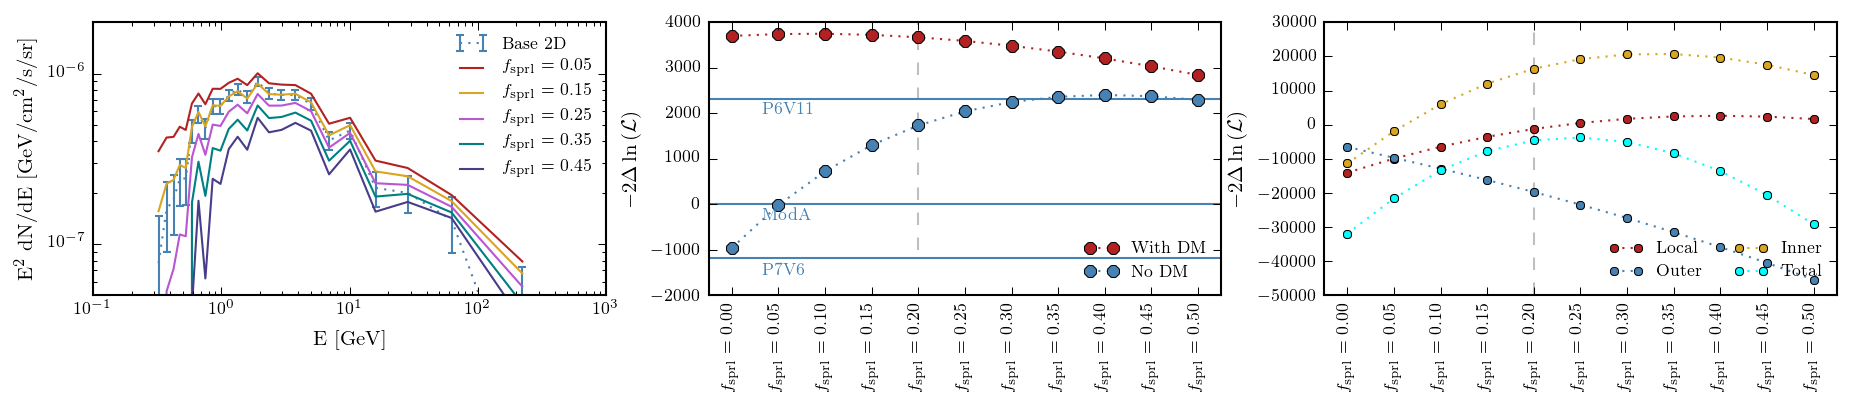

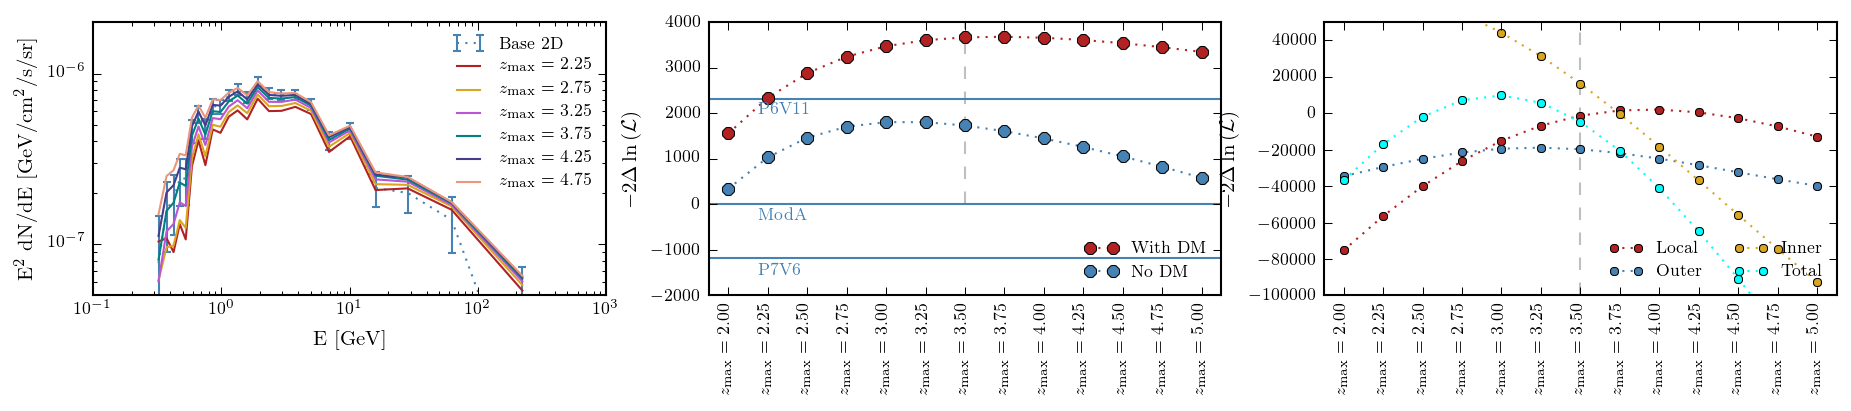

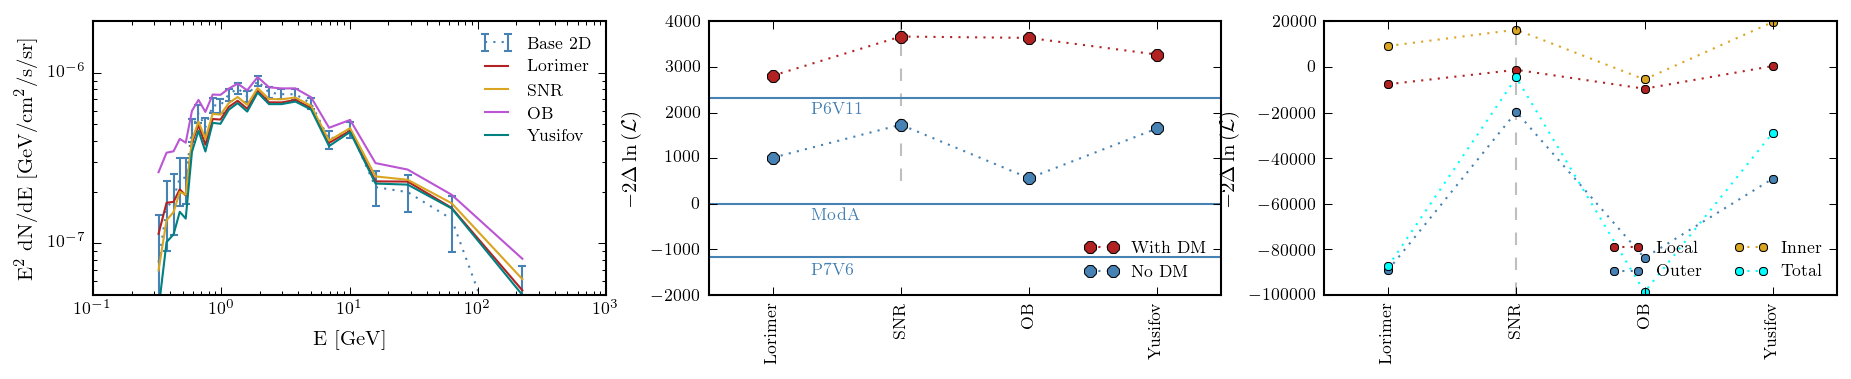

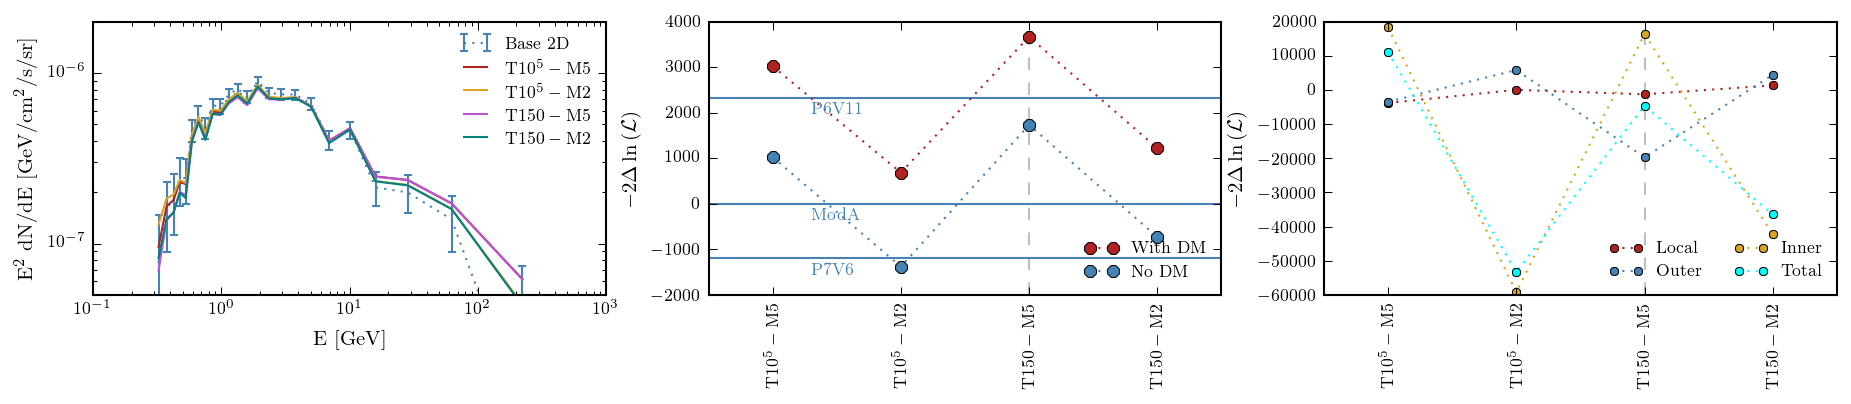

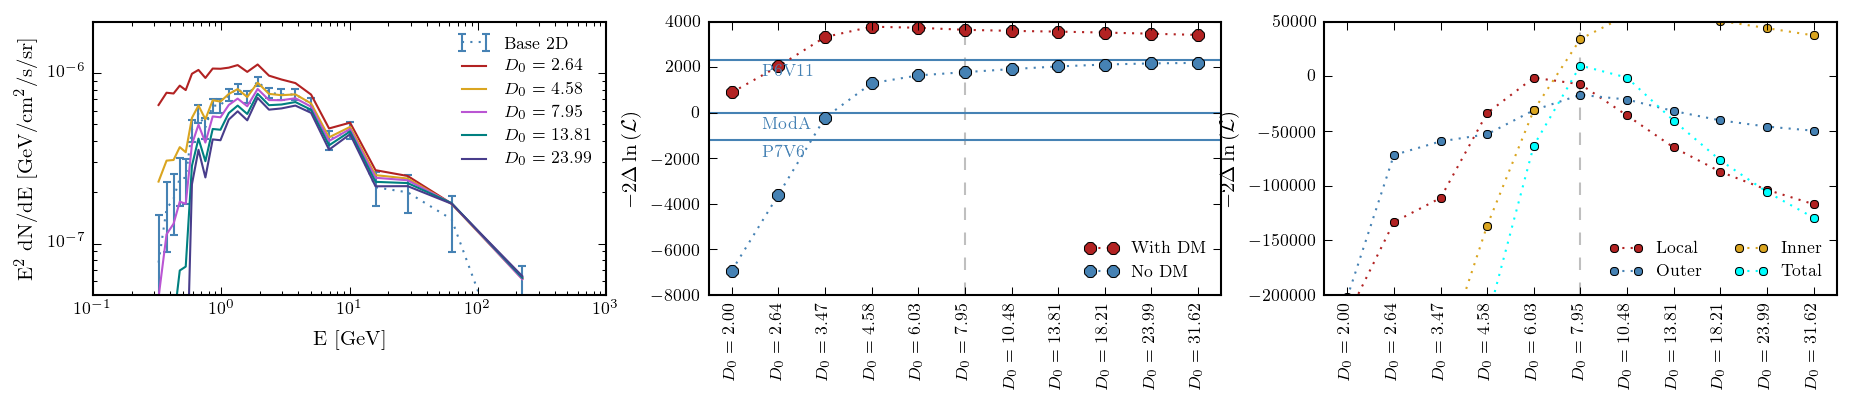

In [63]:

PlotSeries(start=0+86, stop=11+86, text='Spiral Fraction', labels=[r'$f_{\rm H2}=%1.2f$'%i for i in np.linspace(0,.5,11)], mod=2, line=4)
plt.show()
PlotSeries(start=11+86, stop=24+86, text='z_{\rm max}', labels=[r'$z_{\rm max}=%1.2f$'%i for i in np.linspace(2,5,13)], mod=2, ylim_glob=(-1e5,.5e5), line=6)
plt.show()
PlotSeries(start=24+86, stop=28+86, text='Primary CR Sources', labels=('Lorimer','SNR','OB','Yusifov'), line=1)
plt.show()
PlotSeries(start=28+86, stop=32+86, text=r'$\rm T_S$ and Mag(B-V)', labels=(r'$\rm T10^5-M5$',r'$\rm T10^5-M2$',r'$\rm T150-M5$',r'$\rm T150-M2$'), line=2)
plt.show()
PlotSeries(start=32+86, stop=43+86, text=r'$\rm D_0\ [10^{28} cm^{3}s^{-1}]$', labels=['$D_0=%2.2f' % D + '$' for D in np.logspace(np.log10(2e28),29.5,11)/1e28], ylim_glob=(-2e5,.5e5), mod=2, line=5)
plt.show()


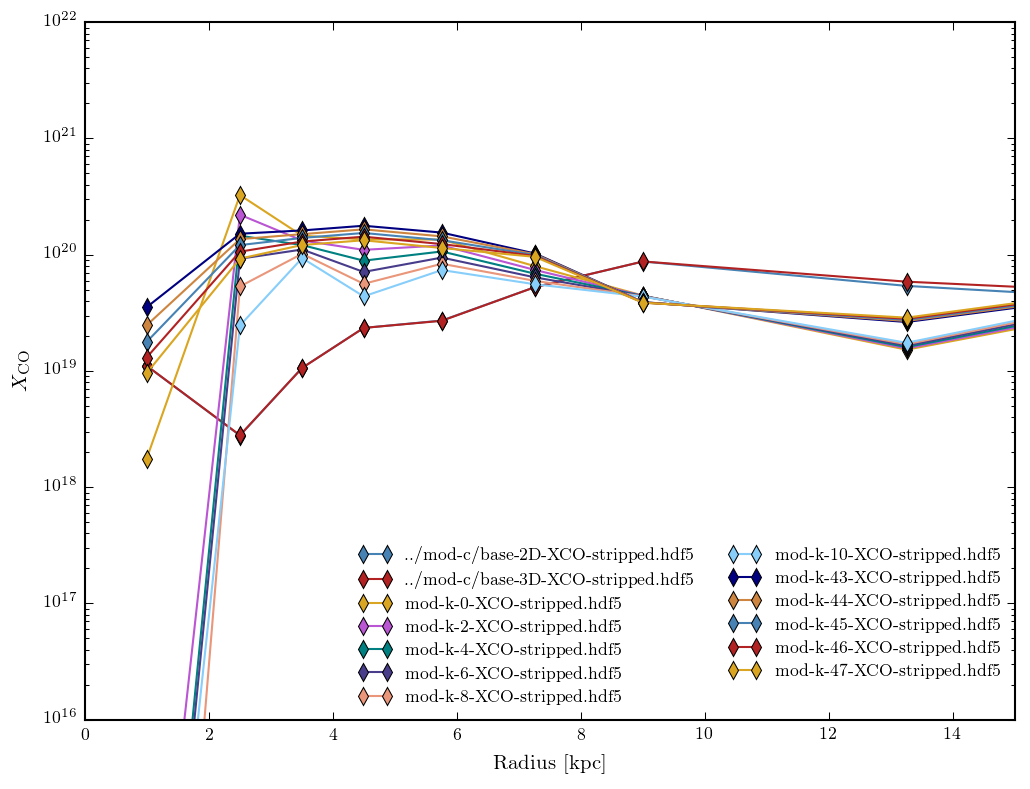

In [89]:
import h5py
import pyfits
h = pyfits.open('/data/galprop2/FITS/rbands_co10mm_v2_2001_qdeg_9R_new.fits.gz')
rings = [.5*(r1+r2) for r1,r2 in h[1].data]



X_CO_values = [6.2560429788495372e+19, 3.4680211758611346e+20, 5.5591619439658749e+20, 3.4376189911339867e+20, 3.151243723689986e+20, 2.6276239270686782e+20, 6.6356248035046998e+19, 1.9567428895977403e+21, 6.8600341256635098e+22]
X_CO_radius = [0.99214279651641846, 2.4978797435760498, 3.5009911060333252, 4.4933414459228516, 5.7537765502929688, 7.2556867599487305, 8.9999980926513672, 13.25, 33.25]
X_CO_interp = lambda x: 10**np.interp(np.log10(x), np.log10(X_CO_radius), np.log10(X_CO_values))


def X_CO_MS04(R):
    fX_CO_= 0.4E20  
    if (R> 3.5): fX_CO_= 0.6E20
    elif (R> 5.5): fX_CO_= 0.8E20
    elif (R> 7.5): fX_CO_= 1.5E20
    elif (R> 9.5): fX_CO_=10.0E20
    return fX_CO_

MS04_xco = np.array([X_CO_MS04(r) for r in rings])

def PlotSeries(start, stop, text, ylim=None, mod=2):
    
    models = ['mod_k_%i_XCO_stripped.hdf5'%i for i in range(start, stop)]
    
    for i, model in enumerate(models):
        if (i%mod)==0:
            h = h5py.File('../mod_c/'+model)
            
            fit_global = h['/fit_results/global'].attrs
            #vals = X_CO_interp(rings)*fit_global['global_XCO']
            vals = MS04_xco*fit_global['global_XCO']
            
            plt.plot(rings, vals, label=model.replace('_','-'), marker='d')
    
def PlotBase():
    
    models = ['../mod_c/base_2D_XCO_stripped.hdf5', '../mod_c/base_3D_XCO_stripped.hdf5'] 
    
    for i, model in enumerate(models):
 
        #try:
            h_base = h5py.File('../mod_c/base_2D_XCO_stripped.hdf5', 'r')
            h = h5py.File('../mod_c/'+model)

            fit_global = h['/fit_results/global'].attrs
            #vals = X_CO_interp(rings)*fit_global['global_XCO']
            vals = MS04_xco*fit_global['global_XCO']
            plt.plot(rings, vals, label=model.replace('_','-'), marker='d')
            

        #except: pass

plt.figure(figsize=(8,6))
PlotBase()
PlotSeries(0,11,'xco',mod=2)
PlotSeries(43,48,'xco',mod=1)
plt.xlabel('Radius [kpc]')
plt.ylabel(r'$X_{\rm CO}$')
plt.legend(loc=4, frameon=False, ncol=2, fontsize=8)
plt.xlim(0,15)
plt.ylim(1e16,1e22)
plt.yscale('log')
    

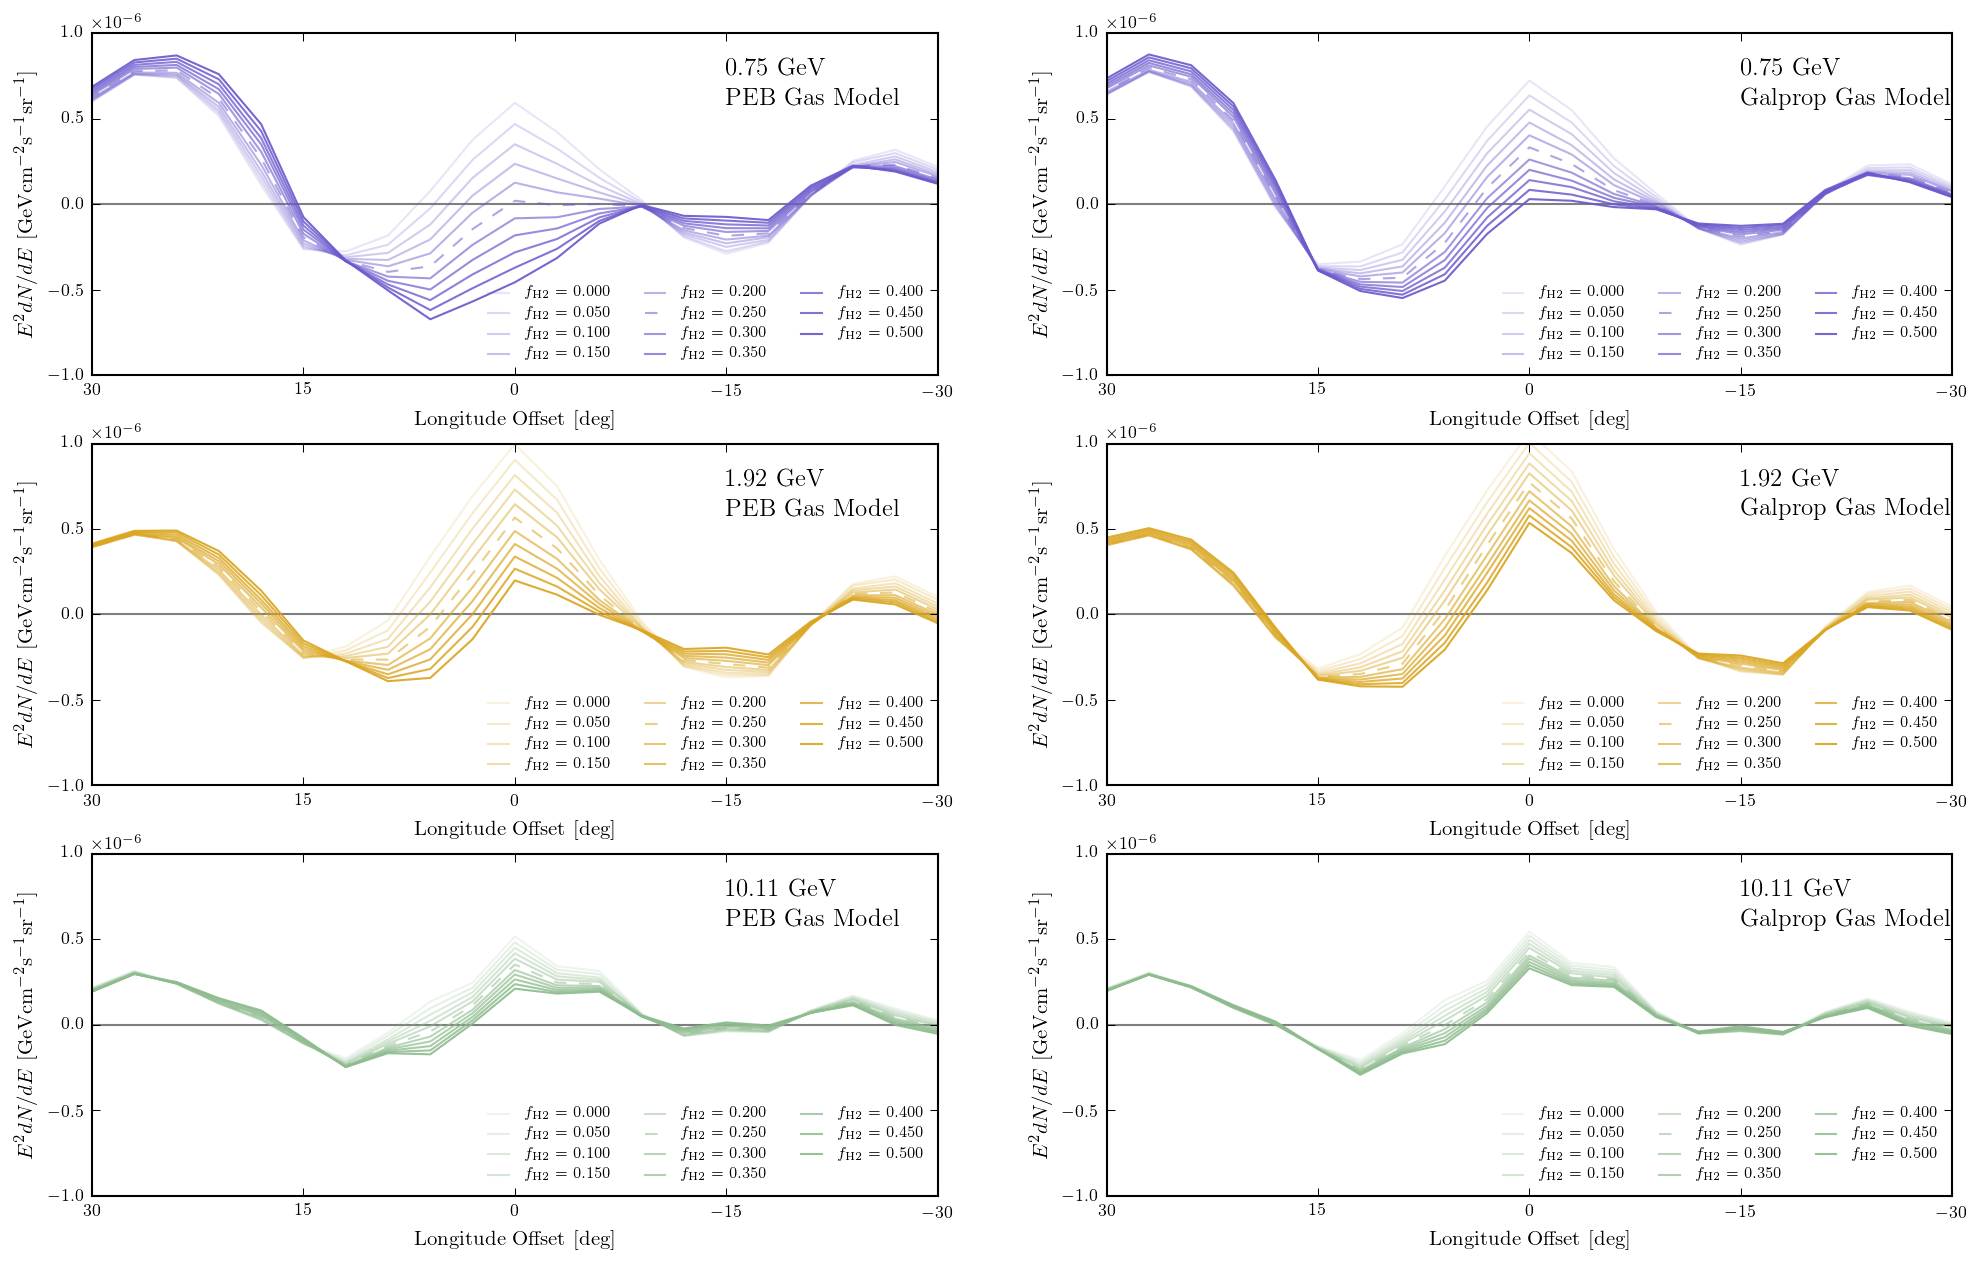

In [15]:
count = 0

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

class FixedOrderFormatter(ScalarFormatter):
    """Formats axis ticks using scientific notation with a constant order of 
    magnitude"""
    def __init__(self, order_of_mag=0, useOffset=True, useMathText=False):
        self._order_of_mag = order_of_mag
        ScalarFormatter.__init__(self, useOffset=useOffset, 
                                 useMathText=useMathText)
    def _set_orderOfMagnitude(self, range):
        """Over-riding this to avoid having orderOfMagnitude reset elsewhere"""
        self.orderOfMagnitude = self._order_of_mag

#plt.figure(figsize=(10,10))
# for i in range(1,10):
#     h5 = h5py.File('../mod_c/mod_f_'+str(i)+'_stripped.hdf5', 'r')
    
#     try:
#         #for f in h5['/fit_results/']: print f
#         energies =  h5['/fit_results/scan_longitude/'].attrs['energies']
#         dm_spec =  h5['/fit_results/scan_longitude/'].attrs['dm_spec']
#         lons =  h5['/fit_results/scan_longitude/'].attrs['longitudes']
        
#         flux500 = [energies[3]**2*spec[3]/1e3 for spec in dm_spec]
#         flux1000 = [energies[10]**2*spec[10]/1e3 for spec in dm_spec]
#         flux2000 = [energies[13]**2*spec[13]/1e3 for spec in dm_spec]
#         flux10000 = [energies[19]**2*spec[19]/1e3 for spec in dm_spec]


#         if i == best_fit:
#             #plt.plot(lons,flux500, c='darkseagreen', alpha=1, ls=':',label='0.5 GeV')
#             plt.plot(lons,flux2000, c='goldenrod', alpha=1, ls=':', label='2 GeV')
#             #plt.plot(lons,flux10000, c='slateblue', alpha=1, ls=':',label='10 GeV')
            
#         else:
#             #plt.plot(lons,flux500, c='darkseagreen', ls='-', alpha=.25)
#             plt.plot(lons,flux2000, c='goldenrod', alpha=(i+1)/11.)
#             #plt.plot(lons,flux10000, c='slateblue', alpha=.25, ls='-')
#     except:
#         pass



def PlotRange(start, stop, energy, c, alpha=None,label=None, text=None):
    for i in range(start,stop):
        h5 = h5py.File('../mod_c/mod_k_'+str(i)+'_XCO_stripped.hdf5', 'r')
        
        
        
        
        try:
            #for f in h5['/fit_results/']: print f
            energies =  h5['/fit_results/scan_longitude/'].attrs['energies']
            dm_spec =  h5['/fit_results/scan_longitude/'].attrs['dm_spec']
            lons =  h5['/fit_results/scan_longitude/'].attrs['longitudes']
            
            ebin = np.argmin(np.abs(energy-energies))

            flux = [energies[ebin]**2*spec[ebin]/1e3 for spec in dm_spec]
    #         flux1000 = [energies[10]**2*spec[10]/1e3 for spec in dm_spec]
    #         flux2000 = [energies[13]**2*spec[13]/1e3 for spec in dm_spec]
    #         flux10000 = [energies[19]**2*spec[19]/1e3 for spec in dm_spec]

            ls = '-'
            if alpha is not None:
                plt.plot(lons,flux, c=c, alpha=alpha, ls=ls, label=label)
            else: 
                
                if i in [5,48]:
                    ls = '--'
                plt.plot(lons,flux, c=c, alpha=(i-start+2)/(stop-start+2.), ls=ls, label=label[i-start])
                
        
        except:
            pass
    
    if text is not None:
        plt.text(-15,7.5e-7, '%1.2f GeV'%(energies[ebin]/1e3))
        plt.text(-15,5.75e-7, text)

    plt.legend(frameon=False, ncol=3, loc=4,fontsize=7)
    plt.ylabel(r'$E^2 dN/dE$ [$\rm GeV cm^{-2} s^{-1} sr^{-1}$]')
    plt.xlabel(r'Longitude Offset [deg]')
    plt.ylim(-10e-7, 1e-6)
    plt.hlines(0,-100,100, alpha=0.5)
    plt.gca().set_xticks(np.linspace(-90,90,13))
    plt.gca().yaxis.set_major_formatter(FixedOrderFormatter(-6))
    plt.xlim(30, -30)
    
    
plt.figure(figsize=(16,10))
plt.subplot(321)
PlotRange(0,11, energy=.75e3, c='slateblue', alpha=None,label=[r'$f_{\rm H2}=%1.3f$'%i for i in np.linspace(0,.5,11)], text='PEB Gas Model')
plt.subplot(323)
PlotRange(0,11, energy=2e3, c='goldenrod', alpha=None,label=[r'$f_{\rm H2}=%1.3f$'%i for i in np.linspace(0,.5,11)], text='PEB Gas Model')    
plt.subplot(325)
PlotRange(0,11, energy=10e3, c='darkseagreen', alpha=None,label=[r'$f_{\rm H2}=%1.3f$'%i for i in np.linspace(0,.5,11)], text='PEB Gas Model')    
#plt.show()

#plt.figure(figsize=(20,10))
plt.subplot(322)
PlotRange(43,54, energy=.75e3, c='slateblue', alpha=None,label=[r'$f_{\rm H2}=%1.3f$'%i for i in np.linspace(0,.5,11)], text='Galprop Gas Model')
plt.subplot(324)
PlotRange(43,54, energy=2e3, c='goldenrod', alpha=None,label=[r'$f_{\rm H2}=%1.3f$'%i for i in np.linspace(0,.5,11)], text='Galprop Gas Model')    
plt.subplot(326)
PlotRange(43,54, energy=10e3, c='darkseagreen', alpha=None,label=[r'$f_{\rm H2}=%1.3f$'%i for i in np.linspace(0,.5,11)], text='Galprop Gas Model')    
    

plt.savefig('/home/carlson/Dropbox/plots/GCE_sys/scan_lon_flux.pdf', bbox_inches='tight')

In [15]:
import h5py
def PlotAxesRatio(start,stop):
    for i in range(start, stop):
        if i%2==0:
            h5 = h5py.File('../mod_c/mod_k_'+str(i)+'_XCO_stripped.hdf5', 'r')

            ll =  h5['/fit_results/scan_axesratio/'].attrs['loglike_total']
            ar =  h5['/fit_results/scan_axesratio/'].attrs['axesratio']
            plt.plot(ar,2*(ll-min(ll)), label='mod %i'%i)

    plt.ylabel(r'$2\Delta\log{(\mathcal{L})}$')
    plt.xlabel(r'Axes Ratio')
    plt.legend(frameon=False, fontsize=8)
    plt.ylim(0,2e2)

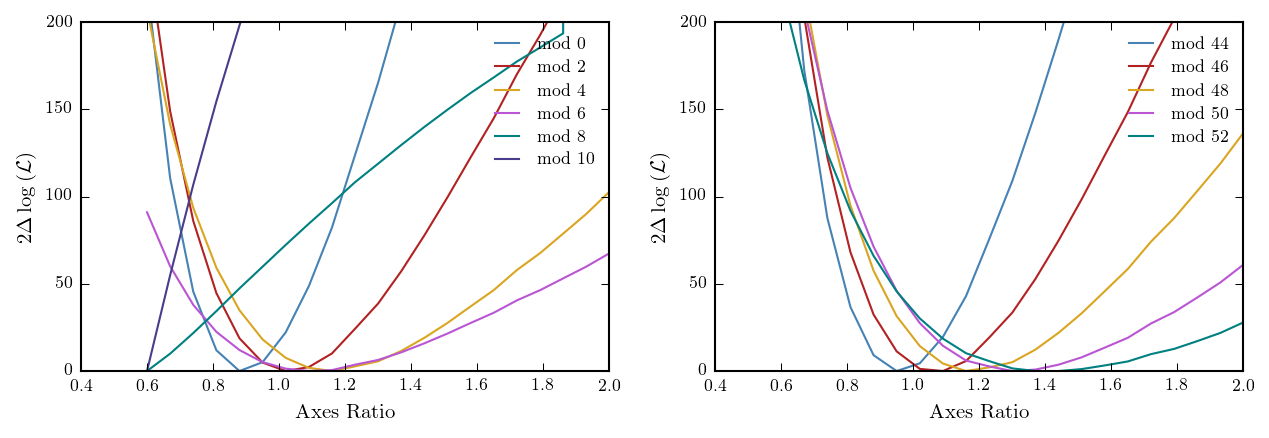

In [16]:
plt.figure(figsize=(10,3))
plt.subplot(121)
PlotAxesRatio(0,11)
plt.subplot(122)
PlotAxesRatio(43,54)

In [23]:
import h5py
from mpl_toolkits.axes_grid1 import AxesGrid

def PlotLocalize(start, stop):
    fig = plt.figure(figsize=(10,10))

    grid = AxesGrid(fig, 111, # similar to subplot(142)
                        nrows_ncols = (4, 3),
                        axes_pad = 0.0,
                        share_all=True,
                        label_mode = "L",
                        cbar_location = "right",
                        cbar_mode="single",)

    for i in range(start,stop):
        k=i-start
        
        #plt.subplot(3,4,i+1)
        h5 = h5py.File('../mod_c/mod_k_'+str(i)+'_XCO_stripped.hdf5', 'r')
        #for f in h5['/fit_results/']:
            #print f  
        ll =  h5['/fit_results/localize/'].attrs['fval']
        ar =  h5['/fit_results/localize/'].attrs['longitudes']

        im = grid[k].imshow(2*(ll-np.min(ll)) ,vmin=0, vmax=200, origin='lower', extent=[min(ar),max(ar),min(ar),max(ar)],
                            interpolation='nearest',cmap='gnuplot')


    


        label = [r'$f_{\rm H2}=%1.2f$'%j for j in np.linspace(0,.5,11)]

        #plt.colorbar(im, label=(r'$2\Delta\log{(\mathcal{L})}$'))
        grid[k].text(.25,-.90, label[k], fontsize=8)
        if i in [0,3,6,9]:
            grid[k].set_ylabel(r'$b$ [deg]')
        if i in [9,10]:
            grid[k].set_xlabel(r'$l$ [deg]')
        #plt.show()

    grid.cbar_axes[0].colorbar(im)
    for cax in grid.cbar_axes[1:]:
            cax.toggle_label(False)

    grid.cbar_axes[0].set_ylabel(r'$2\Delta\log{(\mathcal{L})}$') 



# PEB MODELS

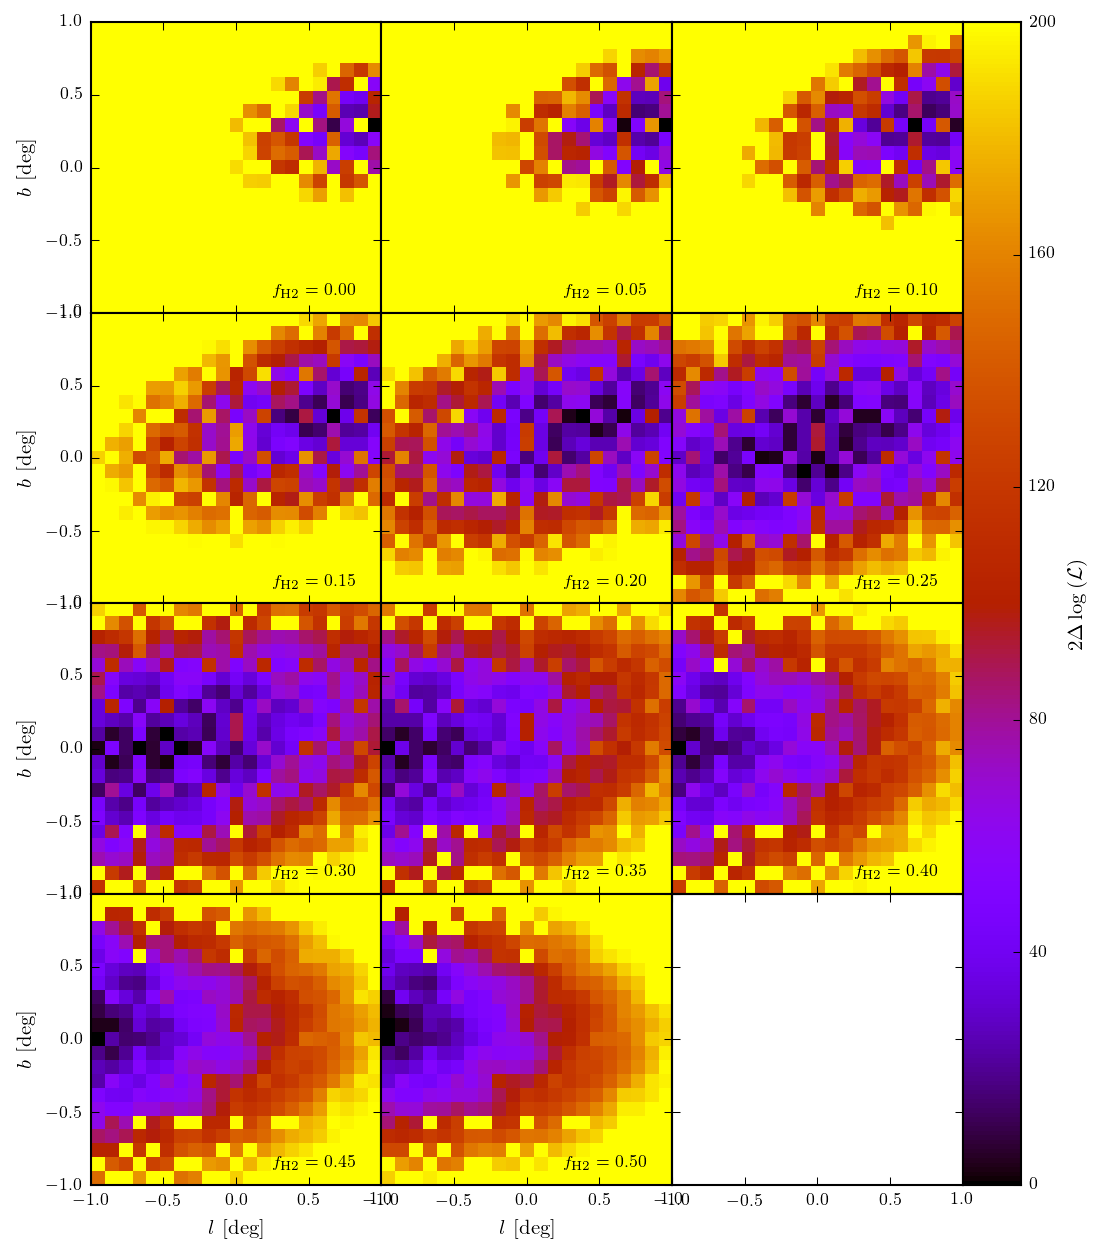

In [24]:
PlotLocalize(0,11)

# GALPROP Models

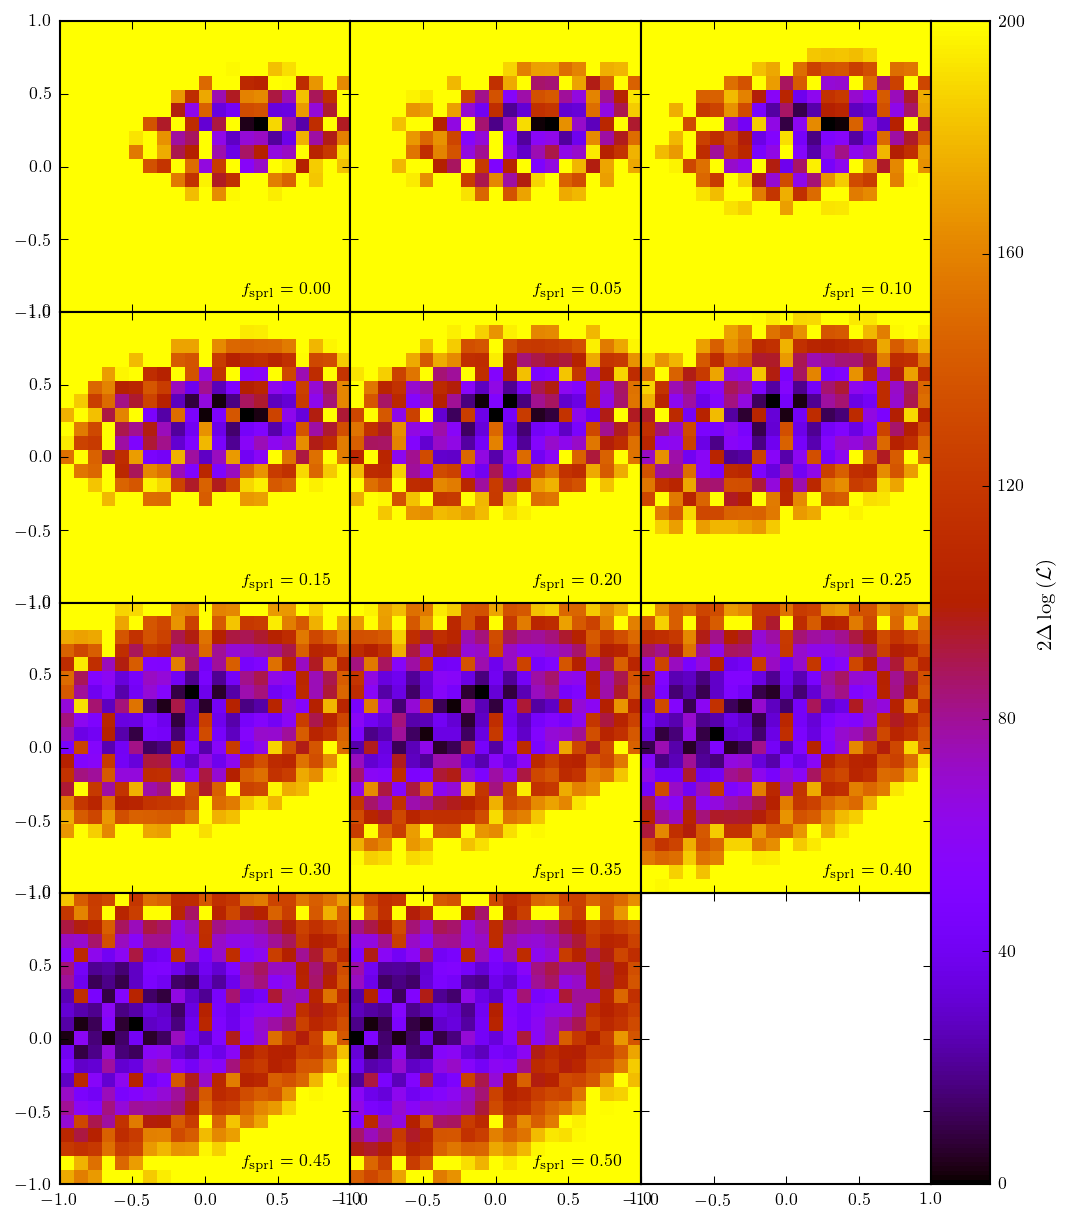

In [20]:
PlotLocalize(43,54)

# Same as above, but paper version with fewer panels

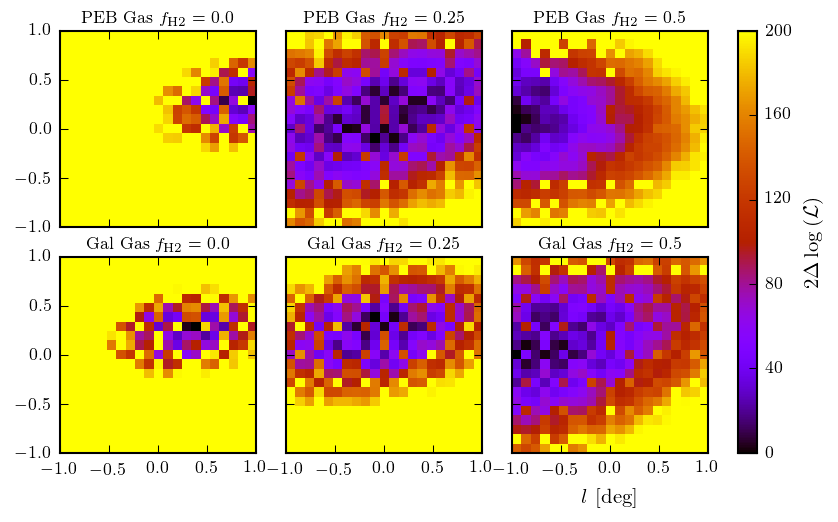

In [46]:
import h5py
from mpl_toolkits.axes_grid1 import AxesGrid

def PlotLocalizePaper(model, sp , label):
    
        
        h5 = h5py.File('../mod_c/mod_k_'+str(model)+'_XCO_stripped.hdf5', 'r')
        ll =  h5['/fit_results/localize/'].attrs['fval']
        ar =  h5['/fit_results/localize/'].attrs['longitudes']
        
        im = grid[sp].imshow(2*(ll-np.min(ll)) ,vmin=0, vmax=200, origin='lower', extent=[min(ar),max(ar),min(ar),max(ar)],
                            interpolation='nearest',cmap='gnuplot')
        
        grid.cbar_axes[0].colorbar(im)
        grid[sp].text(0,1.05, label, fontsize=8, horizontalalignment='center')
        if sp in [1,4]:
            grid[sp].set_ylabel(r'$b$ [deg]')
        if sp > 4 :
            grid[sp].set_xlabel(r'$l$ [deg]')
        plt.xlim(1,-1)

        

    
fig = plt.figure(figsize=(6,8))
grid = AxesGrid(fig, 111, # similar to subplot(142)
                    nrows_ncols = (2, 3),
                    axes_pad = .2,
                    share_all=True,
                    label_mode = "L",
                    cbar_location = "right",
                    cbar_mode="single",)

labels = [r'PEB Gas $f_{\rm H2}=0.0$', r'PEB Gas $f_{\rm H2}=0.25$', r'PEB Gas $f_{\rm H2}=0.5$', 
          r'Gal Gas $f_{\rm H2}=0.0$', r'Gal Gas $f_{\rm H2}=0.25$', r'Gal Gas $f_{\rm H2}=0.5$']
for i_model, model in enumerate([0,5,10,43,48,53]):
    PlotLocalizePaper(model, i_model, labels[i_model] )


for cax in grid.cbar_axes[1:]:
        cax.toggle_label(False)
grid.cbar_axes[0].set_ylabel(r'$2\Delta\log{(\mathcal{L})}$') 


In [86]:
import cPickle as pickle
import h5py

def PlotSpec(start, stop,labels, keys, ylim, colors, dm=True):
    
    #models = ['../mod_c/base_2D_XCO_stripped.hdf5'] + ['mod_k_%i_XCO_stripped.hdf5'%i for i in range(start, stop)]
    models = ['mod_k_%i_XCO_stripped.hdf5'%i for i in range(start, stop)]
    
    for i, model in enumerate(models):
        if i%2==0:
            h = h5py.File('../mod_c/'+model)
            if dm is True:
                fit = h['/fit_results/GC'].attrs
            else:
                fit = h['/fit_results/GC_no_dm'].attrs
            #print fit.keys()
            
            for j, key in enumerate(keys):
                lab = None
                if i == 10:
                    lab = key.replace('flux_',"").replace('_','+')
                if i == 4:
                    plt.errorbar(fit['energies']/1e3, fit['energies']**2*fit[key]/1e3, fit['energies']**2*fit[key.replace('flux','fluxunc')][:,1]/1e3 ,
                                 label=lab,alpha=(i+2)/(stop-start+2.), color=colors[j], marker='o', markersize=2, markeredgecolor=None)
                else:
                    plt.loglog(fit['energies']/1e3, fit['energies']**2*fit[key]/1e3,label=lab,alpha=(i+2)/(stop-start+2.), c=colors[j])
                    
    if start<43:
        plt.text(.37,.93, 'PEB Gas', transform=plt.gca().transAxes, fontsize=10)
        
    else: 
        plt.text(.37,.93, 'Galprop Gas', transform=plt.gca().transAxes, fontsize=10)
        
    if dm==True:
        plt.text(.37,.87, 'With NFW', transform=plt.gca().transAxes, fontsize=10)
    else: 
        plt.text(.37,.87, 'No Dark Matter', transform=plt.gca().transAxes, fontsize=10)
    #fit_no_dm = h['/fit_results/GC_no_dm'].attrs
    
    
    plt.legend(frameon=False, fontsize=8, ncol=1)        
            
    plt.ylim(ylim)
    plt.xlim(3e-1,2.5e2)
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    

#Varying f_H2 (light to dark is increasing f_H2 0.0 - 0.5 in .1 increments
## With DM included in the fit

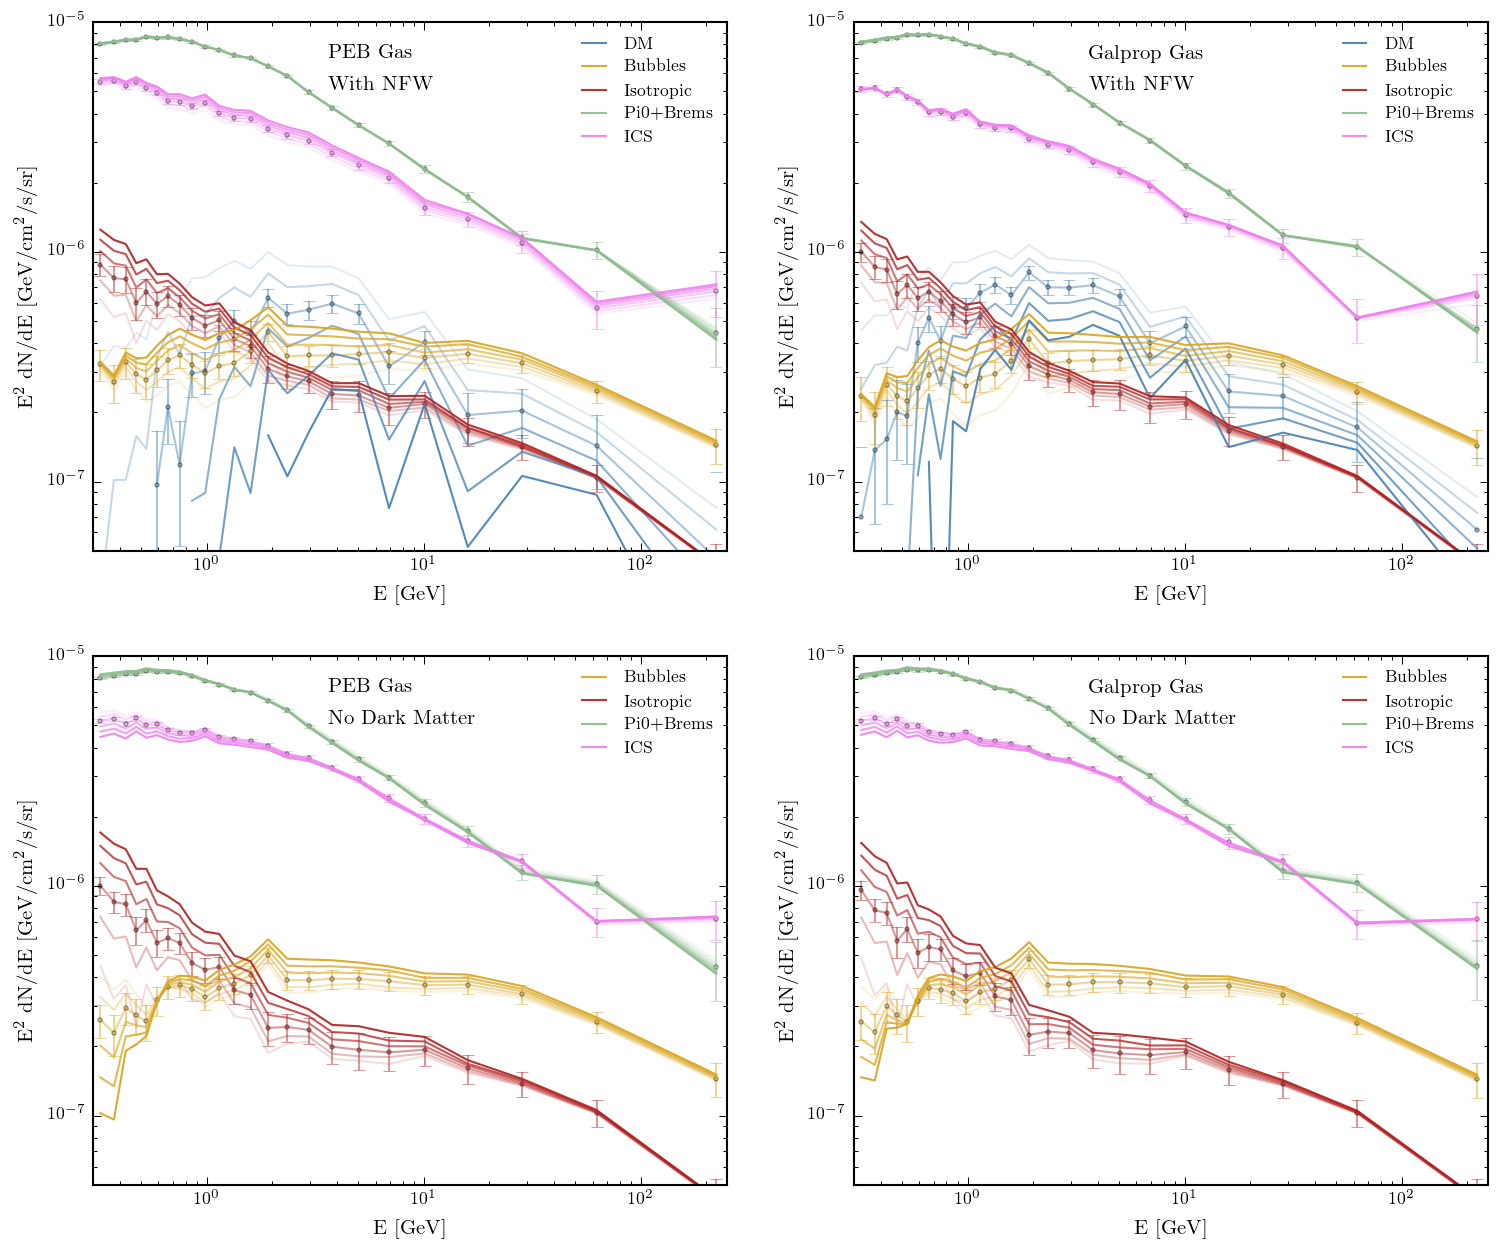

In [87]:
plt.figure(figsize=(12,10))

components = ['flux_DM', 'flux_Bubbles', 'flux_Isotropic',u'flux_Pi0_Brems', u'flux_ICS']
colors = ['steelblue','goldenrod','firebrick', 'darkseagreen','violet']


plt.subplot(2, 2, 1)
PlotSpec(0,11,labels=[r'$f_{\rm H2}=%1.2f$'%i for i in np.linspace(0,.5,11)], keys=components, ylim=(5e-8,1e-5), colors=colors)
plt.subplot(2, 2, 2)
PlotSpec(43,54,labels=[r'$f_{\rm H2}=%1.2f$'%i for i in np.linspace(0,.5,11)], keys=components, ylim=(5e-8,1e-5), colors=colors)
components = [ 'flux_Bubbles', 'flux_Isotropic',u'flux_Pi0_Brems', u'flux_ICS']
colors = ['goldenrod','firebrick', 'darkseagreen','violet']

plt.subplot(2, 2, 3)
PlotSpec(0,11,labels=[r'$f_{\rm H2}=%1.2f$'%i for i in np.linspace(0,.5,11)], keys=components, ylim=(5e-8,1e-5), colors=colors, dm=False)
plt.subplot(2, 2, 4)
PlotSpec(43,54,labels=[r'f_{\rm H2}=%1.2f$'%i for i in np.linspace(0,.5,11)], keys=components, ylim=(5e-8,1e-5), colors=colors, dm=False)


# Same as above, but with Galprop Gas with No DM removed since it looks the same as PEB gas w/ no dm

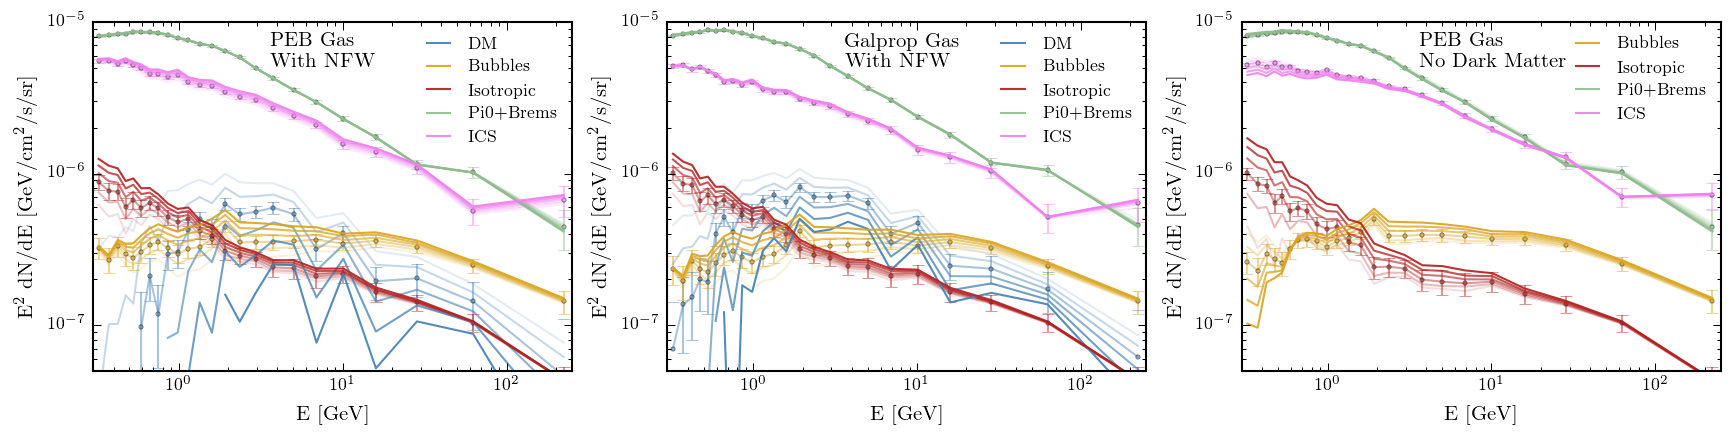

In [88]:
plt.figure(figsize=(14,3))

components = ['flux_DM', 'flux_Bubbles', 'flux_Isotropic',u'flux_Pi0_Brems', u'flux_ICS']
colors = ['steelblue','goldenrod','firebrick', 'darkseagreen','violet']


plt.subplot(1, 3, 1)
PlotSpec(0,11,labels=[r'$f_{\rm H2}=%1.2f$'%i for i in np.linspace(0,.5,11)], keys=components, ylim=(5e-8,1e-5), colors=colors)
plt.subplot(1, 3, 2)
PlotSpec(43,54,labels=[r'$f_{\rm H2}=%1.2f$'%i for i in np.linspace(0,.5,11)], keys=components, ylim=(5e-8,1e-5), colors=colors)
components = [ 'flux_Bubbles', 'flux_Isotropic',u'flux_Pi0_Brems', u'flux_ICS']
colors = ['goldenrod','firebrick', 'darkseagreen','violet']

plt.subplot(1, 3, 3)
PlotSpec(0,11,labels=[r'$f_{\rm H2}=%1.2f$'%i for i in np.linspace(0,.5,11)], keys=components, ylim=(5e-8,1e-5), colors=colors, dm=False)


# Scanning Inner Slope: Profile flattens out with increasing spiral fraction and is already flatter in new gas models.

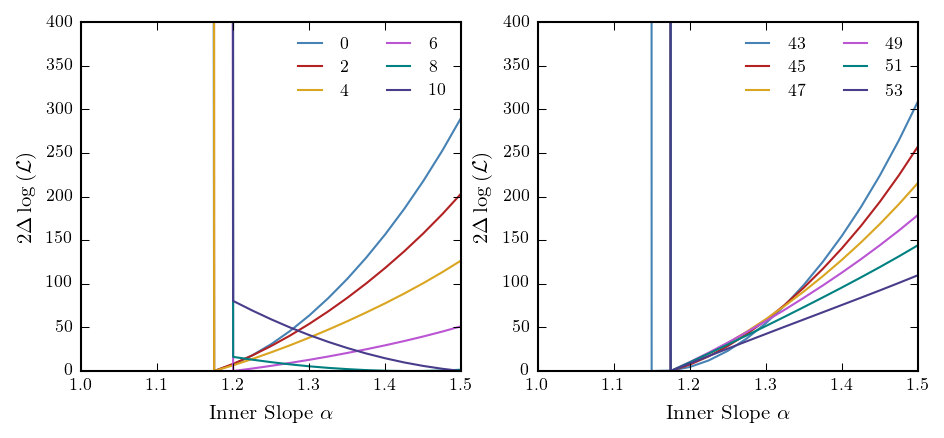

In [26]:
import h5py
plt.figure(figsize=(7.2,3))
def PlotGamma(start, stop):
    min_gam = []
    for i in range(start,stop,2):
        h5 = h5py.File('../mod_c/mod_k_'+str(i)+'_XCO_stripped.hdf5', 'r')


        ll =  h5['/fit_results/scan_gamma/'].attrs['loglike_total']
        gam =  h5['/fit_results/scan_gamma/'].attrs['gamma']
        plt.plot(gam,2*(ll-min(ll)), label=str(i))
        min_gam.append(gam[np.argmin(ll)])    


    plt.xlabel(r'Inner Slope $\alpha$')
    plt.ylabel(r'$2\Delta\log{(\mathcal{L})}$')
    plt.ylim(0,4e2)
    plt.legend(frameon=False, fontsize=8, ncol=2)
    plt.xlim(1,1.5)

plt.subplot(121)
PlotGamma(0,11)
plt.subplot(122)
PlotGamma(43,54)

# Radial profiles for several energies

/home/carlson/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


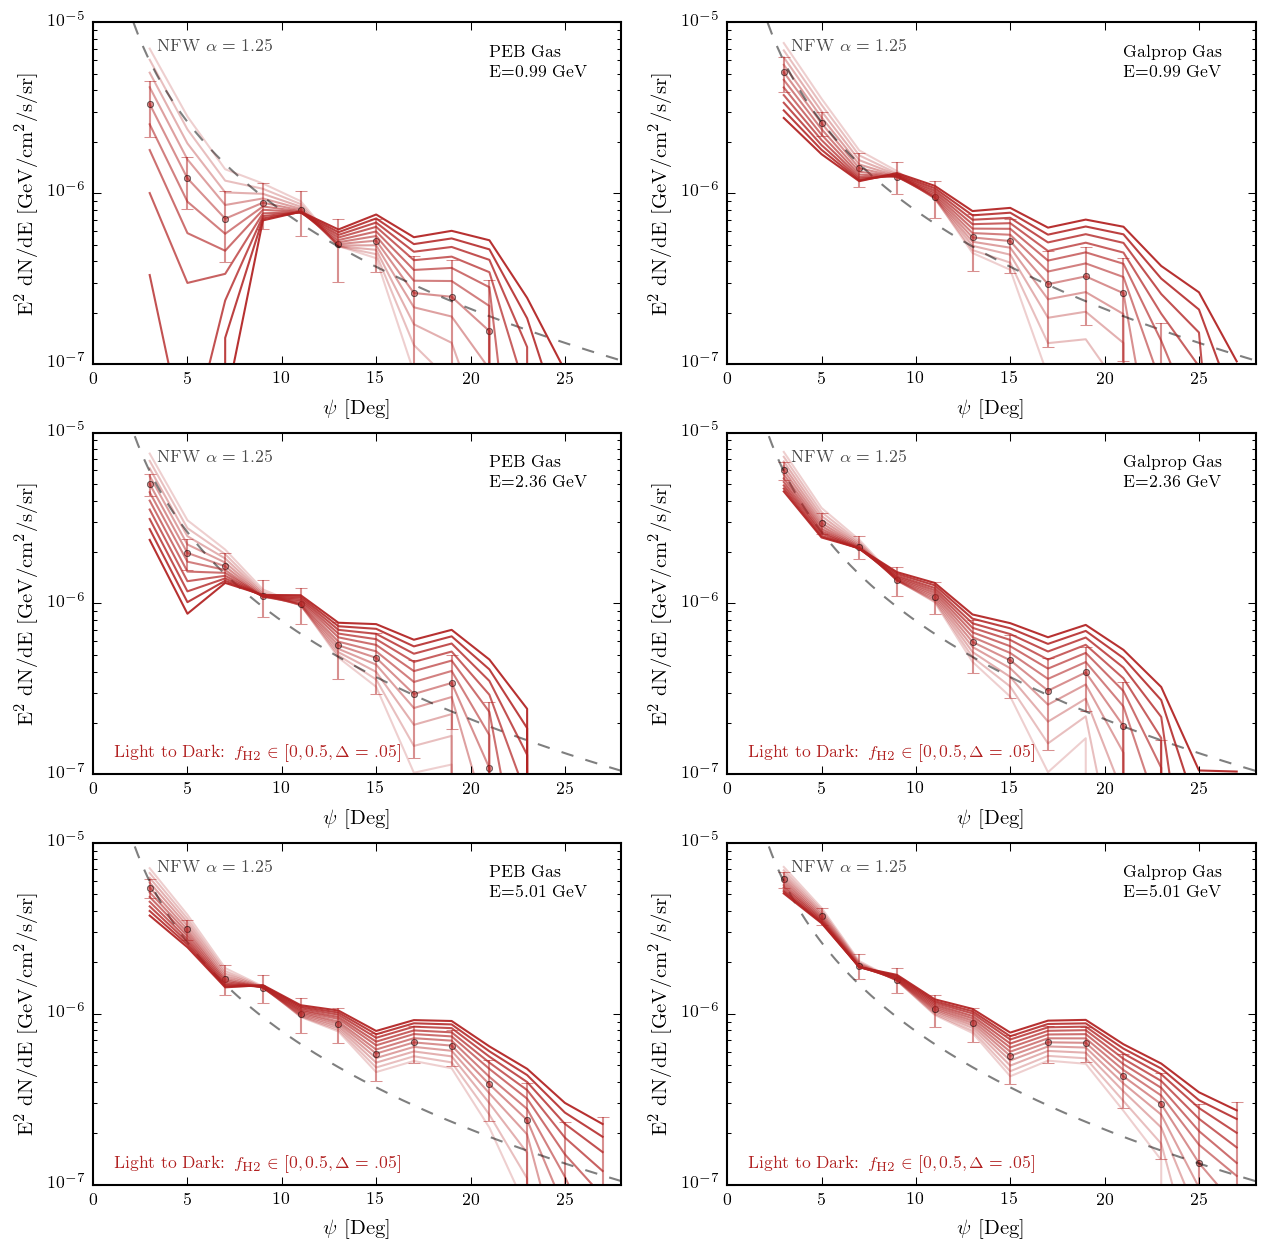

In [1]:
import cPickle as pickle
import h5py
import sys
sys.path.append('/data/GCE_sys/')
import Analysis

# Load the DM profile flux for a gamma=1.25 
radius_, flux_ = pickle.load(open('../DM_radial_profile_alph_1.25.pickle', 'rb'))

def PlotRadial(start, stop, energy, text):
    
    A = Analysis.Analysis(nside=256)
    npix_roi = np.nonzero(A.GenSquareMask(l_range=(-20,20), b_range=(-20,20), plane_mask=2))[0].shape[0]
    area_ratios = None
    
    models = ['mod_k_%i_XCO_stripped.hdf5'%i for i in range(start, stop)]
    
    for i, model in enumerate(models):
        if i%1==0:
            h = h5py.File('../mod_c/'+model)
            fit = h['/fit_results/scan_radius'].attrs
            avR = [.5*(r1+r2) for r1, r2 in fit['radius']]
            
            E = fit['energies']
            
            # Find closest energy
            E_bin = np.argmin(np.abs(energy-E))
            
            if area_ratios is None:
                area_ratios = [npix_roi/float(np.nonzero(A.GenRadialMask(r1,r2,plane_mask=2.)*A.GenSquareMask(l_range=(-20,20), b_range=(-20,20), plane_mask=2))[0].shape[0]) for r1, r2 in fit['radius']]
            
            radial_prof = [area_ratios[i_r]*E[E_bin]**2/1e3*fit['flux_ring_%i'%i_r][E_bin] for i_r in range(len(avR))]
            radial_prof_unc = np.array([area_ratios[i_r]*E[E_bin]**2/1e3*fit['fluxunc_ring_%i'%i_r][E_bin] for i_r in range(len(avR))]).T
            
            if i==4:
                plt.errorbar(avR, radial_prof, radial_prof_unc, color='firebrick', alpha=(i+3)/14., marker='o',markersize=3)
                plt.plot(radius_, flux_*2.5e-30 ,color='k',alpha=.5,ls='--')
                plt.text(radius_[27],flux_[25]*3e-30 ,r'NFW $\alpha=1.25$',color='k',fontsize=8, alpha=.7)
                plt.xlim(0,28)
            else:
                plt.errorbar(avR, radial_prof, color='firebrick', alpha=(i+3)/14.)
            

    
    plt.legend(frameon=False, fontsize=10, ncol=1)        
    
    
    plt.text(.75, .9,text, transform=plt.gca().transAxes, fontsize=8, color='k')    
    plt.ylim(1e-7,1e-5)
    plt.text(.75, .84, r'E=%1.2f GeV'%(E[E_bin]/1e3),transform=plt.gca().transAxes, fontsize=8, color='k')
    if energy>1.5e3:
        plt.text(.04, .04, r'Light to Dark: $f_{\rm H2} \in [0,0.5,\Delta=.05]$',transform=plt.gca().transAxes, fontsize=8, color='firebrick')
    plt.yscale('log')
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{\psi\ [Deg]}$')
    
plt.figure(figsize=(10,10))
plt.subplot(321)
PlotRadial(0, 11, 1e3, text='PEB Gas')
plt.subplot(323)
PlotRadial(0, 11, 2.5e3, text='PEB Gas')
plt.subplot(325)
PlotRadial(0, 11, 5e3, text='PEB Gas')


plt.subplot(322)
PlotRadial(43, 54, 1e3, text='Galprop Gas')
plt.subplot(324)
PlotRadial(43, 54, 2.5e3, text='Galprop Gas')
plt.subplot(326)
PlotRadial(43, 54, 5e3, text='Galprop Gas')

    

#Spectrum as a function of radius

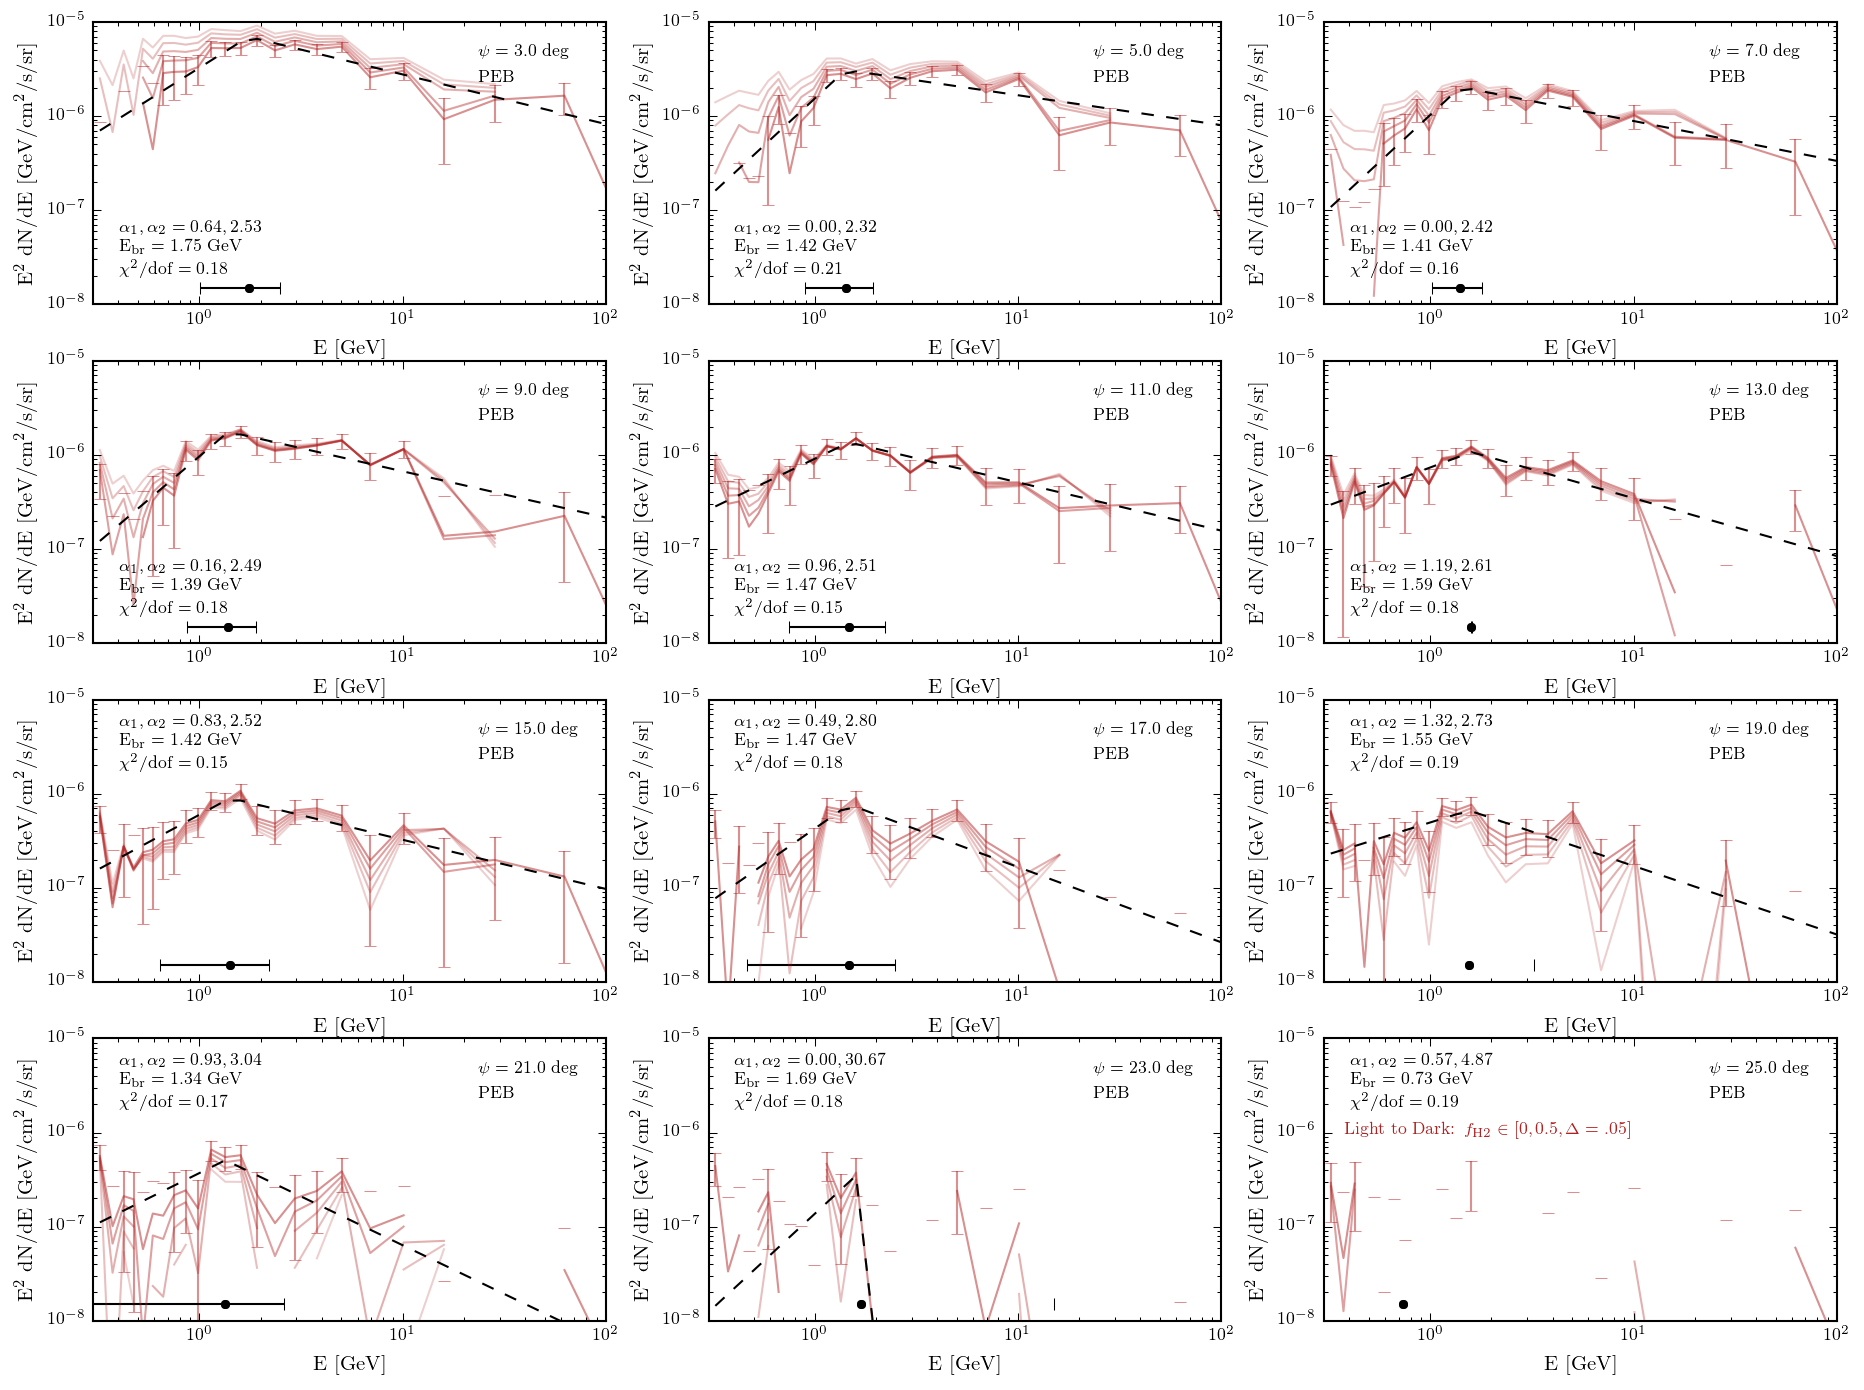

In [3]:
import cPickle as pickle
import h5py
import sys
sys.path.append('/data/GCE_sys/')
import Analysis

import warnings
warnings.filterwarnings("ignore")

import iminuit 
import h5py


def BPLSpec(E, norm, index1, index2, E_break):
    return norm*5e-9*   np.piecewise(E, ((E<E_break), (E>=E_break)), (lambda E: (E/E_break)**-index1, lambda E: (E/E_break)**-index2))
    

def FitSpectrumBPL(E, flux, fluxunc, index1=None, index2=None, E_break=None, print_level=1):
    '''
    Fit a broken-power-law spectrum to the input data.
    
    :params E: energies corresponding to flux
    :params flux: flux of spectrum
    :params fluxunc: uncertainty on flux (single gaussian value)
    :params index1: Low energy spectral index. if None, float, otherwise fix to specified value
    :params index2: High energy spectral index. if None, float, otherwise fix to specified value
    :params E_break: Break energy in units of the input spectrum.
    '''
    def f(norm, index1, index2, E_break):
        '''Calculate chisq'''
        model = BPLSpec(E, norm, index1, index2, E_break)        
        chisq = np.sum( ((flux-model)/fluxunc)**2 )
        return np.log(chisq)
            
    E_break_val=2.
    E_break_fixed = False
    if E_break is not None:
        E_break_val = E_break
        E_break_fixed=True
        
    index1_val=2
    index1_fixed = False
    if index1 is not None:
        index1_val = index1
        index1_fixed=True
    
    index2_val=3
    index2_fixed = False
    if index2 is not None:
        index2_val = index2
        index2_fixed=True
    
    m = iminuit.Minuit( f, print_level=print_level, index1=index1_val, norm=1., index2=index2_val, E_break=E_break_val, errordef=1., 
                        error_norm=.5, error_E_break=.1, error_index1=.1, error_index2=.1,
                        limit_index1=[0,None],  limit_norm=[0,None],  limit_index2=[0,None], limit_E_break=[0,None],
                      fix_E_break=E_break_fixed, fix_index1=index1_fixed, fix_index2=index2_fixed)
    m.migrad()
    try: 
        m.minos()
    except: 
        m.hesse()
    reduced_chisq = m.fval/(len(flux)-4-1) # 4 params, reduced chisq

    return m, reduced_chisq



def PlotRadialSpectra(start, stop, text):
    
    A = Analysis.Analysis(nside=256)
    npix_roi = np.nonzero(A.GenSquareMask(l_range=(-20,20), b_range=(-20,20), plane_mask=2))[0].shape[0]
    area_ratios = None
    
    models = ['mod_k_%i_XCO_stripped.hdf5'%i for i in range(start, stop)]
    
    for i, model in enumerate(models):
        if i%1==0:
            h = h5py.File('../mod_c/'+model)
            fit = h['/fit_results/scan_radius'].attrs
            avR = [.5*(r1+r2) for r1, r2 in fit['radius']]
            
            E = fit['energies']
            
            # Find closest energy
            #E_bin = np.argmin(np.abs(energy-E))
            
            if area_ratios is None:
                area_ratios = [npix_roi/float(np.nonzero(A.GenRadialMask(r1,r2,plane_mask=2.)*A.GenSquareMask(l_range=(-20,20), b_range=(-20,20), plane_mask=2))[0].shape[0]) for r1, r2 in fit['radius']]
            
            radial_prof = [area_ratios[i_r]*E**2/1e3*fit['flux_ring_%i'%i_r] for i_r in range(len(avR))]
            radial_prof_unc = np.array([area_ratios[i_r]*E**2/1e3*fit['fluxunc_ring_%i'%i_r][:,1] for i_r in range(len(avR))])
            
            
            for i_r,r in enumerate(avR):
                
                if r > 25:
                    continue
                
                plt.subplot(6,3,i_r+1)
                if i==4:
                    plt.yscale('log')
                    plt.xscale('log')
                    plt.ylim(1e-8, 1e-5)
                    plt.xlim(3e-1,1e2)
                    plt.text(.75, .88, r'$\psi=%1.1f$ deg'%r, transform=plt.gca().transAxes, fontsize=8, color='k')    
                    plt.text(.75, .79,text, transform=plt.gca().transAxes, fontsize=8, color='k')    
                    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
                    plt.xlabel(r'$\rm{E\ [GeV]}$')
                    plt.errorbar(E/1e3, radial_prof[i_r], radial_prof_unc[i_r,], color='firebrick', alpha=(i+3)/14., marker='')
                    

                    
                    # ------------------------------------------------------------
                    # FITTING THE SPECTRUM 
                    fit_E = E[:-1]/1e3
                    flux = radial_prof[i_r][:-1]/(fit_E**2*1e3)
                    fluxunc = radial_prof_unc[i_r][:-1]/(fit_E**2*1e3)

                    bad_bins = []
                    for i_f, fu in enumerate(fluxunc):
                        if fu==0:
                            fluxunc[i_f] = 1e50
                            bad_bins.append(i_f)

                    m, reduced_chisq = FitSpectrumBPL(fit_E, flux, fluxunc, print_level=0)
                    for i in bad_bins: 
                        fluxunc[i] = 0
                    
                    x_lab, y_lab = 0.05, 0.25
                    if r>14:
                        y_lab += .65
                    model = BPLSpec(E/1e3,**m.values)
                    plt.loglog(E/1e3, E**2/1e3*model, color='k',ls='--')
                    #plt.errorbar(E,E**2*flux,E**2*fluxunc.T)
                    E_br = m.values['E_break']
                    #print m.get_merrors().keys(), (m.get_merrors()['E_break'].lower, m.get_merrors()['E_break'].upper)
                    #print (np.abs(m.get_merrors()['E_break'].lower), m.get_merrors()['E_break'].upper)
                    
                    try:
                        xerr = (np.abs((m.get_merrors()['E_break'].lower, m.get_merrors()['E_break'].upper),),).T
                    except:
                        xerr = m.errors['E_break']
                    
                    plt.errorbar(E_br,plt.ylim()[0]*1.5, xerr=xerr, marker='o',markersize=4, color='k')
                    plt.text(x_lab, y_lab, r'$\alpha_1, \alpha_2 = %1.2f, %1.2f$'%(m.values['index1'],m.values['index2']), transform=plt.gca().transAxes, fontsize=8)
                    plt.text(x_lab, y_lab-.075, r'$ \rm E_{br}=%1.2f\ GeV$'%m.values['E_break'], transform=plt.gca().transAxes, fontsize=8)
                    plt.text(x_lab, y_lab-.14, r'$\chi^2/{\rm dof}=%1.2f$'%reduced_chisq, transform=plt.gca().transAxes, fontsize=8)
                    # ------------------------------------------------------------
                    
                    
                else:
                    plt.loglog(E/1e3, radial_prof[i_r], color='firebrick', alpha=(i+3)/14.)
            

    
    
    plt.legend(frameon=False, fontsize=10, ncol=1)        
    
    plt.text(.04, .65, r'Light to Dark: $f_{\rm H2} \in [0,0.5,\Delta=.05]$',transform=plt.gca().transAxes, fontsize=8, color='firebrick')
    #plt.text(.04, .15, r'E=%1.2f GeV'%(E[E_bin]/1e3),transform=plt.gca().transAxes, fontsize=8, color='k')

plt.figure(figsize=(15,17))
PlotRadialSpectra(0, 5, text='PEB')
plt.show()
# plt.figure(figsize=(8,12))
# PlotRadialSpectra(43, 54, text='Galprop')

#Spectral Evolution of BPL parameters with radius: indices, norm, and break energy are floating

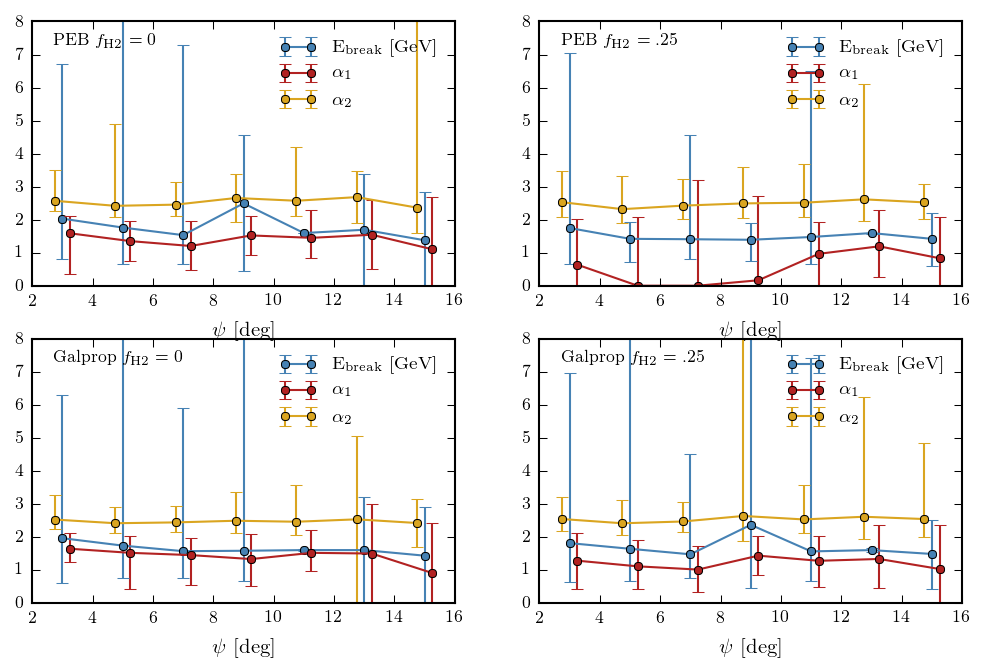

In [4]:

def PlotFitParameters(model, text, sp ):
    
    alpha1_list, alpha2_list, e_break_list = [], [], []
    alpha1_err_list, alpha2_err_list, e_break_err_list = [], [], []
    r_list = [] 
    
    A = Analysis.Analysis(nside=256)
    npix_roi = np.nonzero(A.GenSquareMask(l_range=(-20,20), b_range=(-20,20), plane_mask=2))[0].shape[0]
    area_ratios = None
        
    h = h5py.File('../mod_c/mod_k_%i_XCO_stripped.hdf5'%model)
    fit = h['/fit_results/scan_radius'].attrs
    avR = [.5*(r1+r2) for r1, r2 in fit['radius']]

    E = fit['energies']

    if area_ratios is None:
        area_ratios = [npix_roi/float(np.nonzero(A.GenRadialMask(r1,r2,plane_mask=2.)*A.GenSquareMask(l_range=(-20,20), b_range=(-20,20), plane_mask=2))[0].shape[0]) for r1, r2 in fit['radius']]

    radial_prof = [area_ratios[i_r]*E**2/1e3*fit['flux_ring_%i'%i_r] for i_r in range(len(avR))]
    radial_prof_unc = np.array([area_ratios[i_r]*E**2/1e3*fit['fluxunc_ring_%i'%i_r][:,1] for i_r in range(len(avR))])

    for i_r,r in enumerate(avR):
        if r > 16:
            continue
        # ------------------------------------------------------------
        # FITTING THE SPECTRUM 
        fit_E = E[:-1]/1e3
        flux = radial_prof[i_r][:-1]/(fit_E**2*1e3)
        fluxunc = radial_prof_unc[i_r][:-1]/(fit_E**2*1e3)
        r_list.append(r)
        bad_bins = []
        for i_f, fu in enumerate(fluxunc):
            if fu==0:
                fluxunc[i_f] = 1e50
                bad_bins.append(i_f)

        m, reduced_chisq = FitSpectrumBPL(fit_E, flux, fluxunc, print_level=0)
        for i in bad_bins: 
            fluxunc[i] = 0

        x_lab, y_lab = 0.05, 0.3
        model = BPLSpec(E/1e3,**m.values)
        #plt.loglog(E/1e3, E**2/1e3*model, color='k',ls='--')
        #plt.errorbar(E,E**2*flux,E**2*fluxunc.T)
        e_break_list.append(m.values['E_break'],)
        #print m.get_merrors()['E_break'].upper, m.get_merrors()['E_break'].lower
        alpha1_list.append(m.values['index1'],)
        alpha2_list.append(m.values['index2'],)
        #e_break_err_list.append(m.errors['E_break'],)
        try:
            e_break_err_list.append([m.get_merrors()['E_break'].lower, m.get_merrors()['E_break'].upper],)
            alpha1_err_list.append([m.get_merrors()['index1'].lower, m.get_merrors()['index1'].upper],)
            alpha2_err_list.append([m.get_merrors()['index2'].lower, m.get_merrors()['index2'].upper],)
        except:
            e_break_err_list.append([m.values['E_break'], m.values['E_break']],)
            alpha1_err_list.append([m.values['index1'], m.values['index1']])
            alpha2_err_list.append([m.values['index2'], m.values['index2']])
        
    plt.subplot(2,2,sp)
    r_list = np.array(r_list)
    plt.errorbar(r_list, e_break_list, np.abs(np.array(e_break_err_list).T), marker='o',markersize=4, label=r'$\rm E_{break}\ [GeV]$')
    plt.errorbar(r_list+.25, alpha1_list, np.abs(np.array(alpha1_err_list).T),marker='o',markersize=4, label=r'$\alpha_1$')
    plt.errorbar(r_list-.25, alpha2_list, np.abs(np.array(alpha2_err_list).T),marker='o',markersize=4, label=r'$\alpha_2$')
    plt.text(.05, .90, text, transform=plt.gca().transAxes, fontsize=8)
    plt.legend(frameon=False)
    plt.xlabel(r'$\rm \psi\ [deg]$')
    plt.ylim(0, 8)
    
plt.figure(figsize=(8,5)) 
PlotFitParameters(0,r'PEB $f_{\rm H2}=0$',1)
PlotFitParameters(4,r'PEB $f_{\rm H2}=.25$',2)
PlotFitParameters(43,r'Galprop $f_{\rm H2}=0$',3)
PlotFitParameters(47,r'Galprop $f_{\rm H2}=.25$',4)

##Vary the fraction of Galprop gas model ( with other 1-f_GalGas being PEB) vs f_H2

In [161]:
import cPickle as pickle
import h5py

def PlotMixtures():
    
    models = ['mod_k_%i_XCO_stripped.hdf5'%i for i in range(0, 11)]
    LL, LL_no_dm = np.zeros((11,11)), np.zeros((11,11))
    for i, model in enumerate(models):
        h = h5py.File('../mod_c/'+model)

        peb_frac = ['/fit_results/galprop_frac_%1.2f/'%frac for frac in np.linspace(0,1,11)]
        LL[i,:] = np.array([h[frac].attrs['loglike_total'] for frac in peb_frac])
        
        peb_frac_no_dm = ['/fit_results/galprop_frac_no_dm_%1.2f/'%frac for frac in np.linspace(0,1,11)]
        LL_no_dm[i,:] = np.array([h[frac].attrs['loglike_total'] for frac in peb_frac_no_dm])
    
    
    plt.figure(figsize=(12,2.5))
    
    plt.subplot(131)
    plt.imshow(2*(LL-np.min(LL)), origin='lower', cmap='rainbow', interpolation='nearest', vmax=3500, extent=[-.05,1.05,-0.025,.525], aspect=2)
    plt.plot()
    plt.colorbar(label=r'$\Delta \chi^2 = -2\Delta\log{(\mathcal{L})}$')
    plt.ylabel(r'$f_{\rm H2}$')
    plt.xlabel(r'$f_{\rm Galprop\ Gas}$')
    plt.text(0,.45,'With DM',fontsize=10)
    
    plt.scatter(1, .25 , color='cyan', s=8)
    plt.scatter(0, .2 , color='cyan', s=8)
    plt.scatter(1, .35 , color='goldenrod', s=8, marker='s')
    plt.scatter(0, .25 , color='goldenrod', s=8, marker='s')
    plt.ylim(-.025,.525)
    plt.xlim(-.05,1.05)
    
    plt.subplot(132)
    plt.imshow(2*(LL_no_dm-np.min(LL_no_dm)), origin='lower', cmap='rainbow', interpolation='nearest', vmax=3500, extent=[-.05,1.05,0.-.025,.525], aspect=2)
    plt.plot()
    plt.colorbar(label=r'$\Delta \chi^2 = -2\Delta\log{(\mathcal{L})}$')
    plt.ylabel(r'$f_{\rm H2}$')
    plt.xlabel(r'$f_{\rm Galprop\ Gas}$')
    plt.text(0,.45,'No DM',fontsize=10)
    
    plt.scatter(1, .25 , color='cyan', s=8)
    plt.scatter(0, .2 , color='cyan', s=8)
    plt.scatter(1, .35 , color='goldenrod', s=8, marker='s')
    plt.scatter(0, .25 , color='goldenrod', s=8, marker='s')
    plt.ylim(-.025,.525)
    plt.xlim(-.05,1.05)
    
    plt.subplot(133)
    plt.imshow(-2*(LL-LL_no_dm), origin='lower', cmap='rainbow', interpolation='nearest', extent=[-.05,1.05,-0.025,.525], aspect=2)
    plt.plot()
    plt.colorbar(label=r'${\rm TS}=-2\Delta\log{(\mathcal{L})}$')
    plt.ylabel(r'$f_{\rm H2}$')
    plt.xlabel(r'$f_{\rm Galprop\ Gas}$')
    plt.text(0,.45,'TS of DM',fontsize=10, color='white')
    
    plt.scatter(1, .25 , color='cyan', s=8)
    plt.scatter(0, .2 , color='cyan', s=8)
    plt.scatter(1, .35 , color='goldenrod', s=8, marker='s')
    plt.scatter(0, .25 , color='goldenrod', s=8, marker='s')
    plt.ylim(-.025,.525)
    plt.xlim(-.05,1.05)
    
    plt.show()
    
    


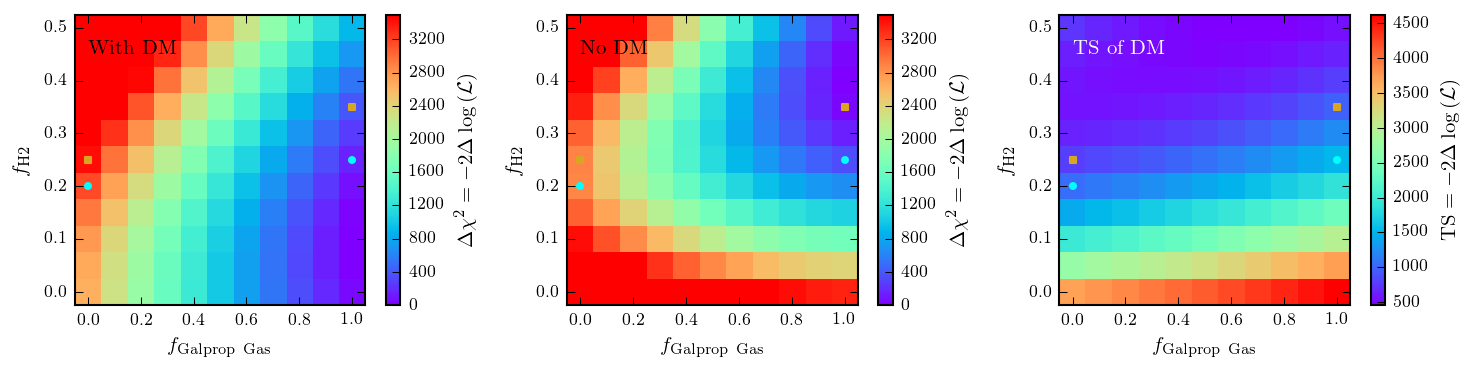

In [162]:
PlotMixtures()